# House Prices Predition

Este Notebook será utilizado para a elaboração de modelos matemáticos, baseado em regressão linear, para a predição de valores de casas à partir de um conjunto de variáveis (features).

In [1]:
# APLICAÇÃO DE UM COMANDO PARA AMPLIAR A LARGURA DA CÉCULA DO CADERNO DE ANOTAÇÕES.
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;} </style>"))

C:\Users\John\AppData\Local\Temp\ipykernel_1436\2184633295.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Bibliotecas Necessárias para o desenvolvimento do modelo.

Serão carregadas as principais bibliotecas para a construção do modelo de Regressão Linear.

In [2]:
# Bibliotecas e módulos utilizados no caderno.
import numpy as np                                  # Pacote para Computação Científica (Manipulação de matrizes)
import pandas as pd                                 # Pacote para auxílio em Análise de Dados
import statistics as sts
import statsmodels.api as sm                        # Pacote para manipulação de operações estatísticas
import matplotlib.pyplot as plt                     # Biblioteca para criação de gráficos e visualizações de dados em geral.
from sklearn.linear_model import LinearRegression   # Módulo para a regressão linear com a biblioteca de ferramentas para o Aprendizado de máquinas.
from sklearn.model_selection import train_test_split # Importa uma função da biblioteca sklearn para a separação dos dados de teste e de validação.
from sklearn.metrics import accuracy_score          # Método de verificação da acurácia do modelo.
import seaborn as sns                               # Biblioteca de visualização de dados baseado na biblioteca marplotlib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge       # Biblioteca para a aplicação da regularização L1 e L2.
sns.set()     

# Carregamento do arquivo.

Neste tópico será carregado o arquivo que contém os dados que serão utilizados tanto para treinamento do modelo, quando para a validação.

Inicialmente esses dados então em uma estrutura separada por vírgulas e serão importados para o padrão de data frame.

In [3]:
# Importando o arquivo .csv para um data frame
dados = pd.read_csv('train.csv')

Lembrando que o arquivo que foi importado encontra-se na mesma pasta do arquivo Notebook, por isso não foi necessário passar o caminho.

# Visualização Geral do Conjunto de Dados

Inicialmente será verificada, visualmente, de como está a distribuição dos dados no Data Frame.

In [4]:
# Configuração inicial para que sejam mostradas todas as colunas do data frame
pd.set_option('display.max_columns', 82)
# Visualização das 3 primeiras linhas
dados.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


# Separação dos Dados de treinamento dos dados de Validação

Inicialmente serão separados os dados de treinamento do modelo dos dados que serão utilizados para o treinamento.
Após essa separação iremos manipular apenas os dados de treinamento.

In [5]:
# Separação das targets e das features.
features = dados.drop(columns=['SalePrice'])       # Separa apenas os dados característicos
targets = dados['SalePrice']                       # Separa os dados de referência


# Função de separação dos dados de treinamento e dos dados de validação
X_treinamento, X_validacao, y_treinamento, y_validacao = train_test_split(features, targets, test_size = 0.2, random_state = 42)

# Criação de um Data frame apenas com os valores de treino.
dados_treino = pd.concat([X_treinamento,y_treinamento], axis = 1)

# Cópia do dataframe dados_treino para a eliminação de valores considerados anómalos. 
df_sem_outlier = dados_treino
# df_sem_outlier = dados_treino.copy()

# Atribuindo um nome 
nome_target = 'SalePrice'

# dados_treino.head()

# Declaração de Data Frames

Serão declarados Data frames que servirão para armazenar os dados para a regressão linear e que auxiliarão nas equações.

In [6]:
# Data frame que armazenará os valores finais da features para a regressão linear
features_numericas = pd.DataFrame()

# Data frame que armazenará os dados da features aplicada o logarítimo neperiano para a regressão linear
features_ln_numericas = pd.DataFrame()

# Data frame com as features numericas sem outlier - 
# Outlier sendo qualquer valor fora do intervalo (< mediana - 3* std e > mediana +3* std)
features_numericas_sem_outlier = pd.DataFrame()

# Data frame para features sem outlier com aplicação do logarítimo neperiano.
features_ln_numericas_sem_outlier = pd.DataFrame()

# Declaração de um Data Frame para armazenar as variáveis categóricas que foram transformada em dicotômicas e que serão utilizadas no modelo de regressão linear.
features_dicotomicas = pd.DataFrame()


# Data frame que armezenará os dados de todas as features com a aplicação do logarítmo neperiano
df_ln = pd.DataFrame()

# Data frame que armezenará os dados de todas as features com a aplicação do logarítmo neperiano com a eliminação de alguns valores
df_ln_sem_outlier = pd.DataFrame()


nome_linhas = ['Regressão Linear Teste', 'Regressão Linear Validação',\
               'Regressão Linear L1 Teste', 'Regressão Linear L1 Validação',\
               'Regressão Linear L2 Teste', 'Regressão Linear L2 Validação']
nome_colunas = ['Numéricas', 'Tranformada ln', 'Numéricas sem Outlier', 'Transformada ln sem Outlier']

# Data frame de armazenamento dos valores de R^2(coeficiente de determinação) dos modelos
score_df = pd.DataFrame(index=nome_linhas, columns=nome_colunas)

# VISUALIZAÇÃO GERAL DO DATA FRAME DE TREINAMENTO

In [7]:
# Configuração inicial para que sejam mostradas todas as colunas do data frame
pd.set_option('display.max_rows', 81)
# VERIFICAÇÃO DE VALORES NÃO VÁLIDOS DO DATA FRAME
display(dados_treino)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
254,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1957,1957,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Rec,922,Unf,0,392,1314,GasA,TA,Y,SBrkr,1314,0,0,1314,1,0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1957.0,RFn,1,294,TA,TA,Y,250,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,145000
1066,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,7,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,799,799,GasA,Gd,Y,SBrkr,799,772,0,1571,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,RFn,2,380,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,178000
638,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,5,7,1910,1950,Gable,CompShg,MetalSd,Wd Sdng,None,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0,Unf,0,796,796,GasA,Gd,Y,FuseA,796,0,0,796,0,0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,P,328,0,164,0,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,85000
799,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,5,7,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,252.0,TA,TA,BrkTil,Gd,TA,No,ALQ,569,Unf,0,162,731,GasA,Ex,Y,SBrkr,981,787,0,1768,1,0,1,1,3,1,Gd,7,Typ,2,TA,Detchd,1939.0,Unf,1,240,TA,TA,Y,0,0,264,0,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,175000
380,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,6,1924,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,LwQ,218,Unf,0,808,1026,GasA,TA,Y,SBrkr,1026,665,0,1691,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Detchd,1924.0,Unf,1,308,TA,TA,Y,0,0,242,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,127000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,6,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,24,Unf,0,1290,1314,GasA,Gd,Y,SBrkr,1314,0,0,1314,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,RFn,2,440,TA,TA,Y,0,22,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,176432
1130,1131,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,4,3,1928,1950,Gable,CompShg,WdShing,Plywood,None,0.0,TA,TA,BrkTil,TA,TA,No,BLQ,622,Unf,0,500,1122,GasA,TA,Y,SBrkr,1328,653,0,1981,1,0,2,0,4,1,Gd,7,Min2,2,TA,Detchd,1981.0,Unf,2,576,TA,TA,Y,431,44,0,0,0,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal,135000
1294,1295,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1955,1990,Hip,CompShg,WdShing,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,167,Unf,0,697,864,GasA,TA,Y,SBrkr,864,0,0,864,1,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1957.0,Unf,2,572,TA,TA,N,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,115000
860,861,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,7,8,1918,1998,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,912,912,GasA,Gd,Y,SBrkr

# Tratamento individual das variáveis.

Nesse tópico cada variável (feature) será avaliada individualmente. Essa análise incluirá: o valor semântico de cada 'feature'; a disposição dos dados da variável; a eliminação (ou substituição) de valores não válidos; a substituição de valores anormais quando comparado ao conjunto de dados; a verificação dessa feature com a variável alvo do modelo. 

Serão armazenados valores sem transformação e valores com a aplicação do logarítmo neperiano às features.

Como referência para a escolha, serão selecionados apenas as features que possuírem uma correlação >= 0.1 ou <= -0.1. 

Tanto para as variáveis não transformadas quanto para as transformadas. 

## MSSubClass (Categórica)

Variável que indica o tipo de habitação envolvida na venda.

Variável que indica o tipo de habitação envolvida na venda.

Embora essa variável tenha valores na forma de números, ela é uma variável categórica, pois representa categorias com a utilização de números.

Número de valores não válidos presente na variável: 0

Verficação da disposição da variável em agurpamento:
MSSubClass
20     434
30      50
40       3
45      10
50     113
60     240
70      52
75      15
80      45
85      17
90      41
120     64
160     49
180      7
190     28
dtype: int64


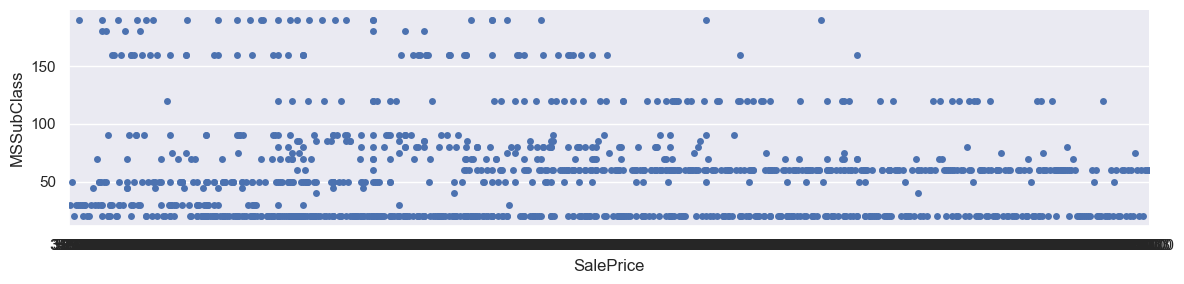

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     29.30
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           8.72e-59
Time:                        14:14:36   Log-Likelihood:                -14647.
No. Observations:                1168   AIC:                         2.932e+04
Df Residuals:                    1155   BIC:                         2.939e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.809e+05   3139.970     57.

In [8]:
nome_feature = 'MSSubClass'

print("Variável que indica o tipo de habitação envolvida na venda.\n")

print("Embora essa variável tenha valores na forma de números, ela é uma variável categórica, pois representa categorias com a utilização de números.")

# Verificação de valores nulos na variável
print(f'\nNúmero de valores não válidos presente na variável: {dados_treino[nome_feature].isnull().sum()}\n')

# Agrupamento dos valores para melhor visualização da variável.
print('Verficação da disposição da variável em agurpamento:')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True, prefix = nome_feature)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# Verificação do data frame.
df_dummies_auxiliar.head(6)


############################################################################################################
# Criação de um gráfico para facilitar o entendimento da dispersão dos dados

sns.catplot(x = nome_target, y = nome_feature, data = dados_treino, height=3, aspect=4)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()
############################################################################################################



############################################################################################################
# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ MSSubClass_30 + MSSubClass_40 + MSSubClass_45 + MSSubClass_50 + MSSubClass_60 + MSSubClass_70 + MSSubClass_75 + MSSubClass_80 + MSSubClass_85 + MSSubClass_90 + MSSubClass_120 + MSSubClass_160", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
print(modelo_dummies.summary())

print("\nVerificando os valores estatístico da regressão linear criada, essa variável representa aproximadamente 25% da variável alvo.\n")
print("É sabido que o tipo de habitação irá interferir no preço final do imóvel.\n")


################################# ARMAZENAMENTO DAS VARIÁVEIS DICOTÔMICAS ##################################
# Eliminação da coluna da variável dependente
df_dummies_auxiliar.drop(columns = [nome_target], inplace = True)

# Armazenamento dos valores da variável
features_dicotomicas[df_dummies_auxiliar.columns] = df_dummies_auxiliar


In [9]:
# nome_feature = 'MSSubClass'

# print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

# print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
# print(dados_treino[[nome_feature, nome_target]].corr())

# print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

# df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
# df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

# print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# # Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# # Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
# med = df_sem_outlier[nome_feature].median()
# df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# # Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# # Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
# df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
# print(df_sem_outlier[[nome_feature, nome_target]].corr())

# print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

# df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
# df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

# print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


# print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

# print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

# print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

# print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

## MSZoning (Categórica)

Identifica a classificação geral de zoneamento da venda.

Essa variável representa o zoneamento da venda do imóvel. Tem-se as seguintes classificações.

 A - Agricultura 
 C - Comercial 
 FV - Habitação em vila flutuante 
 I - Industrial 
 RH - Residencial de alta densidade 
 RL - Residencial de baixa densidade 
 RP - Parque residencial de baixa densidade 
 RM - Residencial de média densidade.

Número de valores não válidos: 0

Verficação da disposição da variável em agrupamento:
MSZoning
C (all)      4
FV          53
RH          15
RL         924
RM         172
dtype: int64

Verificação dos primeiros valores do Data Frame.

      MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  SalePrice
254             0            0            1            0     145000
1066            0            0            1            0     178000
638             0            0            1            0      85000
799             0            0            1            0     175000
380             0            0            1            0     127000
303             0

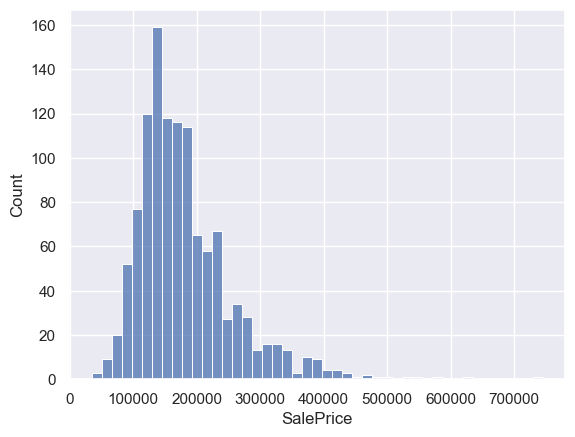

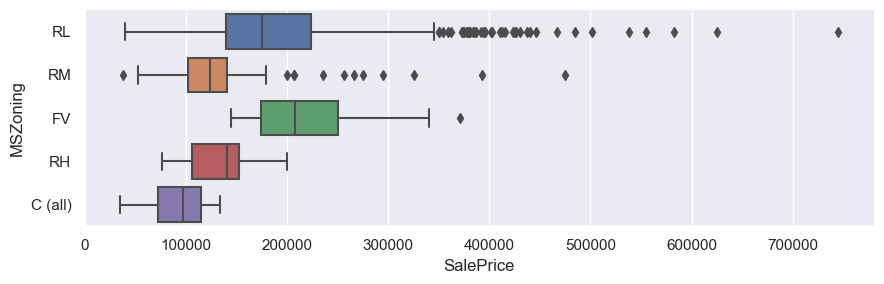


	 Observando a distribuição dos valores da variável categórica é centralizada entorno de 100000 a 300000.
 Isso não contribui para uma melhor explicação do modelo.


Verificação dos primeiros dados do Data Frame.

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     31.03
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           1.41e-24
Time:                        14:14:37   Log-Likelihood:                -14743.
No. Observations:                1168   AIC:                         2.950e+04
Df Residuals:                    1163   BIC:                         2.952e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                     

In [10]:
nome_feature = 'MSZoning'

print("Essa variável representa o zoneamento da venda do imóvel. Tem-se as seguintes classificações.\n")
print(" A - Agricultura \n C - Comercial \n FV - Habitação em vila flutuante \n I - Industrial \n RH - Residencial de alta densidade \n RL - Residencial de baixa densidade \n RP - Parque residencial de baixa densidade \n RM - Residencial de média densidade.\n")

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Agrupamento dos valores da variável
print('Verficação da disposição da variável em agrupamento:')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True, prefix = nome_feature)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

print("\nVerificação dos primeiros valores do Data Frame.\n")
print(df_dummies_auxiliar.head(6))

############################################################################################################
# Criação de um gráfico para facilitar o entendimento da dispersão dos dados

sns.histplot(dados_treino[nome_target])

sns.catplot(x = nome_target, y = nome_feature, data = dados_treino, kind = "box", height=3, aspect=3)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()
############################################################################################################

print('\n\t Observando a distribuição dos valores da variável categórica é centralizada entorno de 100000 a 300000.\n Isso não contribui para uma melhor explicação do modelo.\n')


# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ MSZoning_FV + MSZoning_RH + MSZoning_RL + MSZoning_RM", df_dummies_auxiliar).fit()

print("\nVerificação dos primeiros dados do Data Frame.\n")
print(modelo_dummies.summary())

# print("Essa variável não será adicionada para a construção do modelo de regressão linear")

################################# ARMAZENAMENTO DAS VARIÁVEIS DICOTÔMICAS ##################################
# Eliminação da coluna da variável dependente
df_dummies_auxiliar.drop(columns = [nome_target], inplace = True)

# Armazenamento dos valores da variável
features_dicotomicas[df_dummies_auxiliar.columns] = df_dummies_auxiliar

## LotFrontage (Numérica)

Perímetro de conexão do imóvel com a rua.

In [11]:
nome_feature = 'LotFrontage'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Substituição de valores não válidos pela mediana da variável em ambos os data frames.
dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")


df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# Armazenamento da feature não transformada.
features_numericas[nome_feature] = dados_treino[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas[nome_feature] = df_ln[nome_feature]

# Armazenamento da feature não transformada.
features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 217


Correlação entre LotFrontage e SalePrice

             LotFrontage  SalePrice
LotFrontage     1.000000   0.312157
SalePrice       0.312157   1.000000

Correlação entre ln<LotFrontage> e ln<SalePrice>

             LotFrontage  SalePrice
LotFrontage      1.00000    0.32806
SalePrice        0.32806    1.00000

Correlação entre LotFrontage e SalePrice SEM OUTLIER

             LotFrontage  SalePrice
LotFrontage     1.000000   0.326944
SalePrice       0.326944   1.000000

Correlação entre ln<LotFrontage> e ln<SalePrice> SEM OUTLIER

             LotFrontage  SalePrice
LotFrontage     1.000000   0.324734
SalePrice       0.324734   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_o

## LotArea (Numérica)

Área do imóvel

In [12]:
nome_feature = 'LotArea'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# Armazenamento da feature não transformada.
features_numericas[nome_feature] = dados_treino[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas[nome_feature] = df_ln[nome_feature]

# Armazenamento da feature não transformada.
features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre LotArea e SalePrice

            LotArea  SalePrice
LotArea    1.000000   0.266204
SalePrice  0.266204   1.000000

Correlação entre ln<LotArea> e ln<SalePrice>

           LotArea  SalePrice
LotArea     1.0000     0.4113
SalePrice   0.4113     1.0000

Correlação entre LotArea e SalePrice SEM OUTLIER

            LotArea  SalePrice
LotArea    1.000000   0.379244
SalePrice  0.379244   1.000000

Correlação entre ln<LotArea> e ln<SalePrice> SEM OUTLIER

            LotArea  SalePrice
LotArea    1.000000   0.395981
SalePrice  0.395981   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0



## Street (Categórica)

Tipo de estrada de acesso à propriedade.

In [13]:
nome_feature = 'Street'

print("Variável que indica o tipo de estrada de acesso à propriedade.\n")

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Agrupamente dos valores da variável.
print('Verficação da disposição da variável em agurpamento:')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

print('\nPela forma que os valores estão distribuidos, é possivel supor que essa variável não terá muita contribuição para a definição das variável dependente.\n')

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True, prefix = nome_feature)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

print("\n Primeiros dados do Data Frame.\n")
print(df_dummies_auxiliar.head(6))


# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ Street_Pave", df_dummies_auxiliar).fit()


print("\nVerificação dos parâmetros do modelo.\n")
print(modelo_dummies.summary())

print("\nVerificando os resultados estatístico da regressão linear criada, é possível confirmar que essa variável contribue pouco para a definição da variável dependente, logo não será utilizada no modelo.")

Variável que indica o tipo de estrada de acesso à propriedade.

Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:
Street
Grvl       4
Pave    1164
dtype: int64

Pela forma que os valores estão distribuidos, é possivel supor que essa variável não terá muita contribuição para a definição das variável dependente.


 Primeiros dados do Data Frame.

      Street_Pave  SalePrice
254             1     145000
1066            1     178000
638             1      85000
799             1     175000
380             1     127000
303             1     149900

Verificação dos parâmetros do modelo.

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2797
Date:                Tue, 19 Dec 2023   Prob (F-statistic

## Alley (Categórica)

Tipo de rua de acesso à propriedade

In [14]:
nome_feature = 'Alley'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')
print("Como essa variável possue muitos valores não definido, não será incluída no modelo de regressão linear")

Número de valores não válidos: 1094

Como essa variável possue muitos valores não definido, não será incluída no modelo de regressão linear


## LotShape (Categórica)

Forma geral da propriedade.

Essa variável representa a forma geral da propriedade referente a irregularidade do solo.
Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:
LotShape
IR1    394
IR2     37
IR3      8
Reg    729
dtype: int64

	Verificação inicial do Data Frame criado.

      LotShape_IR2  LotShape_IR3  LotShape_Reg  SalePrice
254              0             0             1     145000
1066             0             0             0     178000
638              0             0             1      85000
799              0             0             1     175000
380              0             0             1     127000
303              0             0             1     149900


C:\Users\John\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\John\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


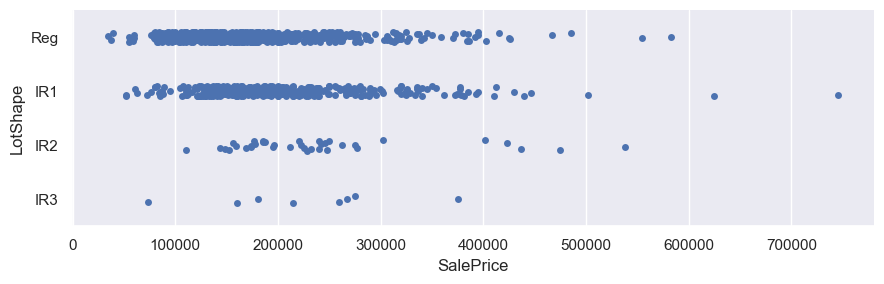

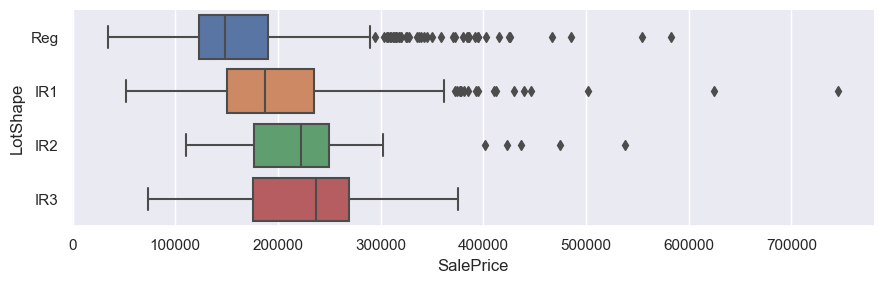

C:\Users\John\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 38.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\John\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


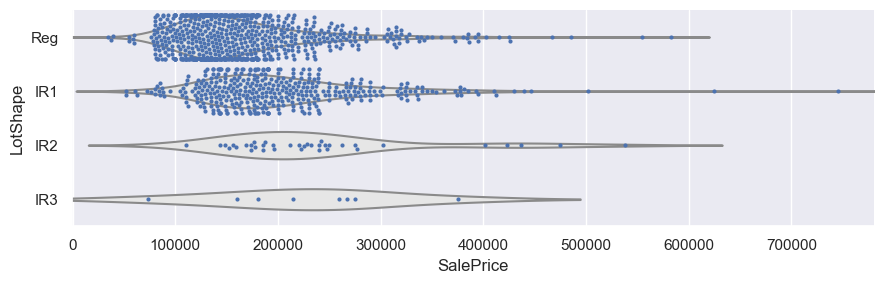


	Verificando os dados dos três gráficos criados, não foi possível visualizar alguma relação que diferencie os dados da variável categórica em relação à variável dependete.


	Dados estatístico da regressão linear criada.

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     29.31
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           2.84e-18
Time:                        14:14:39   Log-Likelihood:                -14760.
No. Observations:                1168   AIC:                         2.953e+04
Df Residuals:                    1164   BIC:                         2.955e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                             

In [15]:
nome_feature = 'LotShape'

print("Essa variável representa a forma geral da propriedade referente a irregularidade do solo.")

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Agrupamento dos valores da variável para facilidar a visualização.
print('Verficação da disposição da variável em agurpamento:')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True, prefix = nome_feature)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

print("\n\tVerificação inicial do Data Frame criado.\n")
print(df_dummies_auxiliar.head(6))


############################################################################################################
# Criação de um gráfico para facilitar o entendimento da dispersão dos dados

sns.catplot(x = nome_target, y = nome_feature, data = dados_treino, height=3, aspect=3)
# ax1.set_axis_labels('nome_target','nome_feature')
# ax1.despine(left=True)   # Remove os limites à esquerda.

sns.catplot(x = nome_target, y = nome_feature, data = dados_treino, kind = "box", height=3, aspect=3)
# ax2.set_axis_labels('nome_target','nome_feature')
# ax2.despine(left=True)   # Remove os limites à esquerda.

sns.catplot(x = nome_target, y = nome_feature, data = dados_treino, kind = "violin", color = ".9", inner = None, height=3, aspect=3)
sns.swarmplot(x = nome_target, y = nome_feature, data = dados_treino, size = 3,)
# ax3.despine(left=True)   # Remove os limites à esquerda.

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()
############################################################################################################

print('\n\tVerificando os dados dos três gráficos criados, não foi possível visualizar alguma relação que diferencie os dados da variável categórica em relação à variável dependete.\n')


############################################################################################################
# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ LotShape_IR2 + LotShape_IR3 + LotShape_Reg", df_dummies_auxiliar).fit()

print("\n\tDados estatístico da regressão linear criada.\n")
print(modelo_dummies.summary())

print('Verificando os dados estatístico da regressão foi obtido uma relação de 0.07 entre as variáveis dicotômicas e a variável depentente.\n')

print('Essa variável não será utilizada para o desenvolvimento do modelo.')

################################# ARMAZENAMENTO DAS VARIÁVEIS DICOTÔMICAS ##################################
# Eliminação da coluna da variável dependente
df_dummies_auxiliar.drop(columns = [nome_target], inplace = True)

# Armazenamento dos valores da variável
features_dicotomicas[df_dummies_auxiliar.columns] = df_dummies_auxiliar

## LandContour (Categórica)

Planicidade da propriedade.

Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:

LandContour
Bnk      48
HLS      35
Low      26
Lvl    1059
dtype: int64

 Varificação dos primeiros valores do Data Frame.

      LandContour_HLS  LandContour_Low  LandContour_Lvl  SalePrice
254                 0                0                1     145000
1066                0                0                1     178000
638                 0                0                1      85000
799                 0                0                1     175000
380                 0                0                1     127000
303                 0                0                1     149900

	 Construção de gráficos para uma análise visual dos dados.



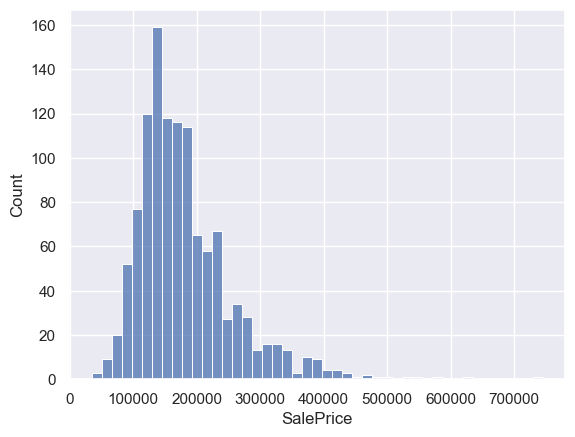

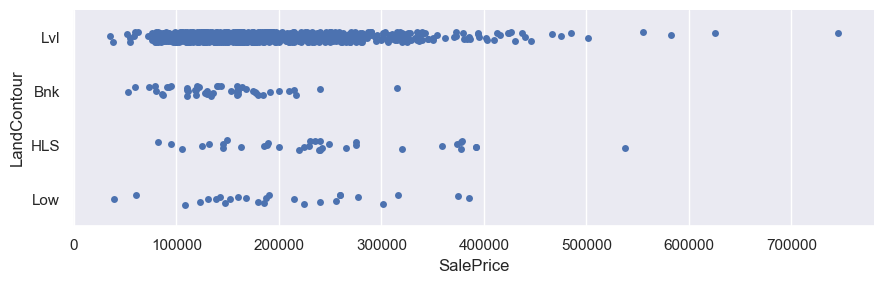

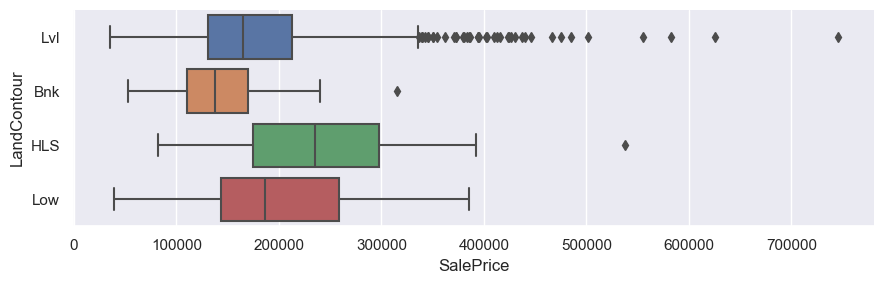


	 A concentração dos dados da variável está praticamente na mesma faixa de valores, entre 100000 a 300000.

Dados estatísticos da regressão linear criada apenas com essa variável categórica e a variável dependente.

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     12.95
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           2.51e-08
Time:                        14:14:40   Log-Likelihood:                -14783.
No. Observations:                1168   AIC:                         2.957e+04
Df Residuals:                    1164   BIC:                         2.960e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                   

In [16]:
nome_feature = 'LandContour'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True, prefix = nome_feature)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

print("\n Varificação dos primeiros valores do Data Frame.\n")
# Verificação do data frame.
print(df_dummies_auxiliar.head(6))


############################################################################################################
# Criação de um gráfico para facilitar o entendimento da dispersão dos dados

print('\n\t Construção de gráficos para uma análise visual dos dados.\n')

sns.histplot(dados_treino[nome_target])

sns.catplot(x = nome_target, y = nome_feature, data = dados_treino, height=3, aspect=3)

sns.catplot(x = nome_target, y = nome_feature, data = dados_treino, kind = "box", height=3, aspect=3)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()
############################################################################################################

print('\n\t A concentração dos dados da variável está praticamente na mesma faixa de valores, entre 100000 a 300000.')

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ LandContour_HLS + LandContour_Low + LandContour_Lvl", df_dummies_auxiliar).fit()

print("\nDados estatísticos da regressão linear criada apenas com essa variável categórica e a variável dependente.\n")
# Verificação dos parâmetros do modelo.
print(modelo_dummies.summary())

############################################################################################################

# print('\nEssa variável representa aproximadamente 3% da variável dependente e não será utilizada no modelo.')

################################# ARMAZENAMENTO DAS VARIÁVEIS DICOTÔMICAS ##################################
# Eliminação da coluna da variável dependente
df_dummies_auxiliar.drop(columns = [nome_target], inplace = True)

# Armazenamento dos valores da variável
features_dicotomicas[df_dummies_auxiliar.columns] = df_dummies_auxiliar


## Utilities (Categórica)

Tipo de utilitários disponíveis.

Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:

Utilities
AllPub    1167
NoSeWa       1
dtype: int64
      NoSeWa  SalePrice
254        0     145000
1066       0     178000
638        0      85000
799        0     175000
380        0     127000
303        0     149900


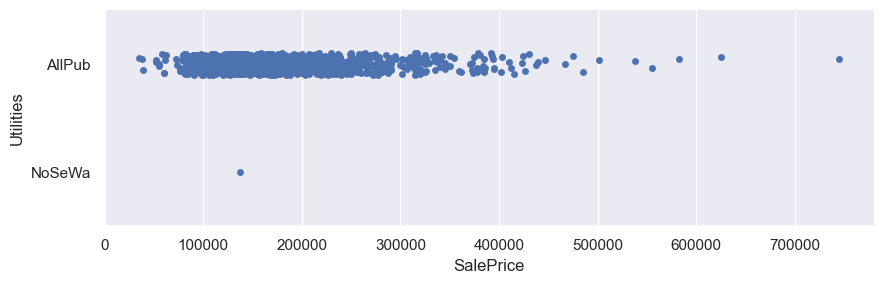


Os dados dessa variável não têm uma boa distribuição, pois apenas um valor corresponde a "NoSeWa".

Essa variável não será utilizada para a construção do modelo.



In [17]:
nome_feature = 'Utilities'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# Verificação do data frame.
print(df_dummies_auxiliar.head(6))

############################################################################################################
# Criação de um gráfico para facilitar o entendimento da dispersão dos dados
sns.catplot(x = nome_target, y = nome_feature, data = dados_treino, height=3, aspect=3)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()

############################################################################################################

print('\nOs dados dessa variável não têm uma boa distribuição, pois apenas um valor corresponde a "NoSeWa".')

print('\nEssa variável não será utilizada para a construção do modelo.\n')

## LotConfig (Categórica)

Configuração do Lote

Variável que representa a configuração do Lote
Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:

LotConfig
Corner     221
CulDSac     84
FR2         38
FR3          3
Inside     822
dtype: int64


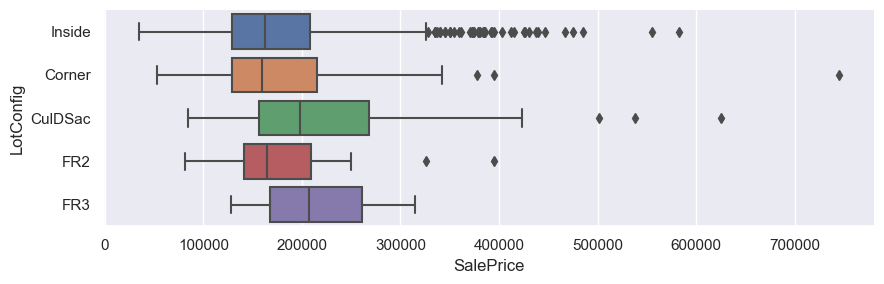


 Graficamente não é possível chegar a alguma conclusão sobre a disposição dos dados com referência a essa varável categórica.

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     6.971
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           1.52e-05
Time:                        14:14:41   Log-Likelihood:                -14789.
No. Observations:                1168   AIC:                         2.959e+04
Df Residuals:                    1163   BIC:                         2.961e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.9

In [18]:
nome_feature = 'LotConfig'

print('Variável que representa a configuração do Lote')

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True, prefix = nome_feature)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

############################################################################################################
# Criação de um gráfico para facilitar o entendimento da dispersão dos dados

sns.catplot(x = nome_target, y = nome_feature, data = dados_treino, kind = "box", height=3, aspect=3)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()
############################################################################################################

print('\n Graficamente não é possível chegar a alguma conclusão sobre a disposição dos dados com referência a essa varável categórica.\n')

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ LotConfig_CulDSac + LotConfig_FR2 + LotConfig_FR3 + LotConfig_Inside", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
print(modelo_dummies.summary())

############################################################################################################

print('\n Essa variável não será utilizada para a construção do modelo.')

################################# ARMAZENAMENTO DAS VARIÁVEIS DICOTÔMICAS ##################################
# Eliminação da coluna da variável dependente
df_dummies_auxiliar.drop(columns = [nome_target], inplace = True)

# Armazenamento dos valores da variável
features_dicotomicas[df_dummies_auxiliar.columns] = df_dummies_auxiliar

## LandSlope (Categórica)

Inclinação da Propriedade.

Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:

LandSlope
Gtl    1108
Mod      51
Sev       9
dtype: int64

	 Apenas pelo agrupamento é possível perceber que essa variável não tem uma relação suficiente para ser utilizado no modelo.



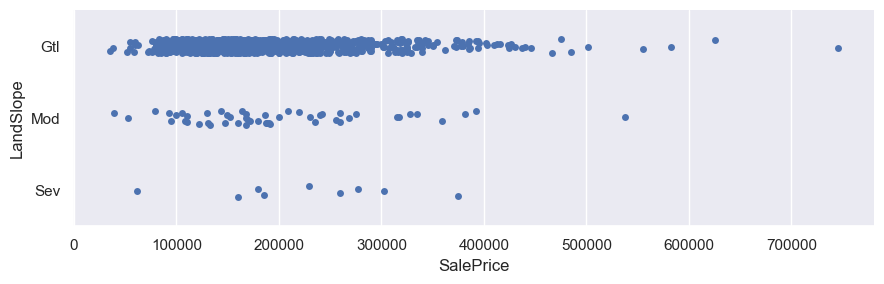

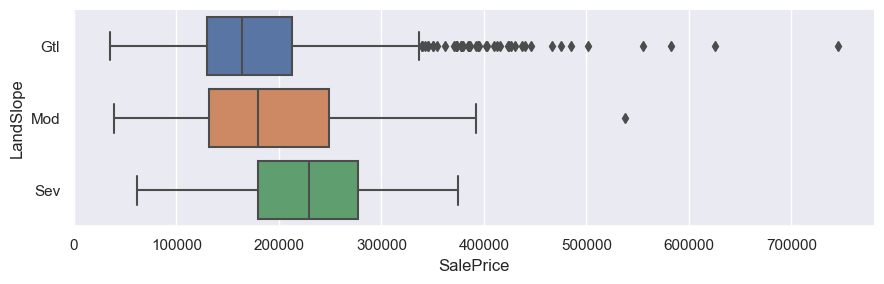

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.918
Date:                Tue, 19 Dec 2023   Prob (F-statistic):             0.0544
Time:                        14:14:41   Log-Likelihood:                -14800.
No. Observations:                1168   AIC:                         2.961e+04
Df Residuals:                    1165   BIC:                         2.962e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.803e+05   2317.353     77.793

In [19]:
nome_feature = 'LandSlope'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

print('\n\t Apenas pelo agrupamento é possível perceber que essa variável não tem uma relação suficiente para ser utilizado no modelo.\n')

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True, prefix = nome_feature)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

############################################################################################################
# Criação de um gráfico para facilitar o entendimento da dispersão dos dados

sns.catplot(x = nome_target, y = nome_feature, data = dados_treino, height=3, aspect=3)

sns.catplot(x = nome_target, y = nome_feature, data = dados_treino, kind = "box", height=3, aspect=3)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()
############################################################################################################

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ LandSlope_Mod + LandSlope_Sev", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
print(modelo_dummies.summary())

print('\nEssa variável não será utilizada no modelo, pois a distribuição dos dados não permite retirar informações importantes para a definição da variável dependente.')

## Neighborhood (Categórica)

Locais físicos dentro dos limites da cidade.

Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:

Neighborhood
Blmngtn     15
Blueste      1
BrDale      13
BrkSide     45
ClearCr     19
CollgCr    115
Crawfor     44
Edwards     87
Gilbert     65
IDOTRR      26
MeadowV     10
Mitchel     40
NAmes      181
NPkVill      7
NWAmes      66
NoRidge     33
NridgHt     61
OldTown     91
SWISU       21
Sawyer      58
SawyerW     44
Somerst     69
StoneBr     20
Timber      28
Veenker      9
dtype: int64

 Box Plot da variável categórica.


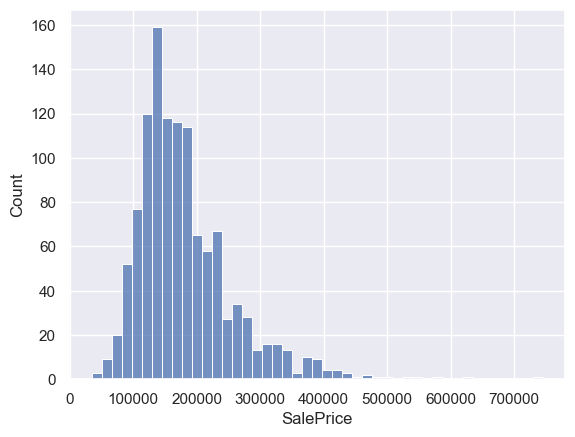

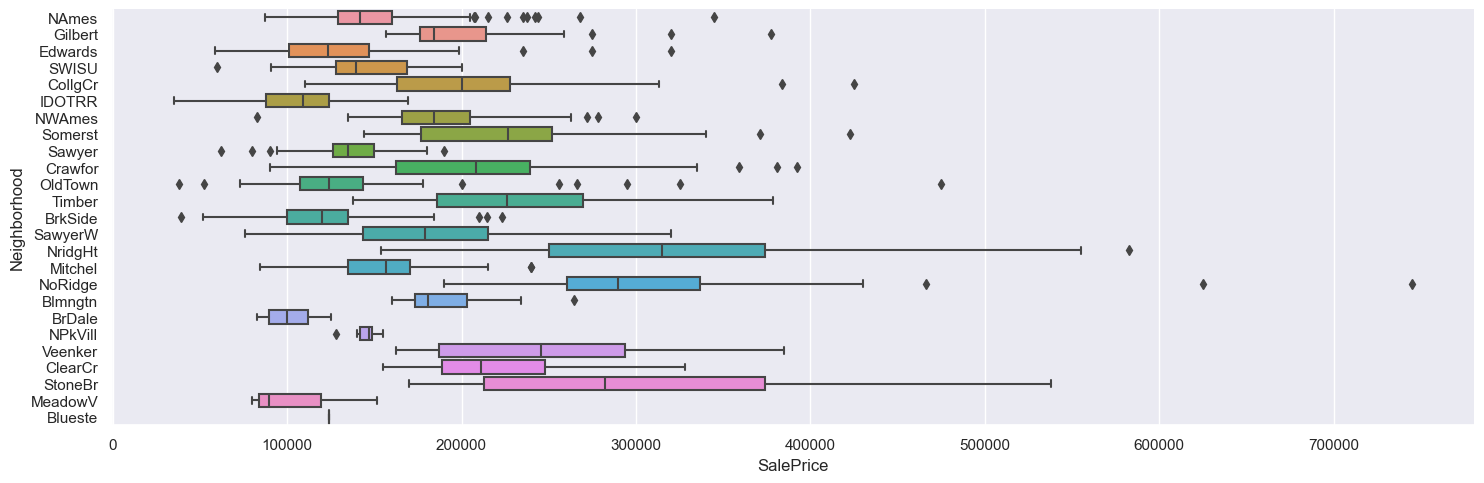

Essa variável categóricas tem categorias bem distribuída por todo os valores de SalePrice, isso é um bom indicador para a utilização dela no modelo.
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     58.69
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          3.93e-170
Time:                        14:14:42   Log-Likelihood:                -14362.
No. Observations:                1168   AIC:                         2.877e+04
Df Residuals:                    1145   BIC:                         2.889e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>

In [20]:
nome_feature = 'Neighborhood'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True, prefix = nome_feature)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# # Verificação do data frame.
# print(df_dummies_auxiliar.head(6))

############################################################################################################
# Criação de um gráfico para facilitar o entendimento da dispersão dos dados

print('\n Box Plot da variável categórica.')

sns.histplot(dados_treino[nome_target])

sns.catplot(x = nome_target, y = nome_feature, data = dados_treino, kind = "box", height=5, aspect=3)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()
############################################################################################################

print('Essa variável categóricas tem categorias bem distribuída por todo os valores de SalePrice, isso é um bom indicador para a utilização dela no modelo.')

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ Neighborhood_Blueste + Neighborhood_BrDale + Neighborhood_BrkSide + Neighborhood_ClearCr + Neighborhood_CollgCr + Neighborhood_Crawfor + Neighborhood_Edwards + Neighborhood_Gilbert + Neighborhood_IDOTRR + Neighborhood_MeadowV + Neighborhood_Mitchel + Neighborhood_NAmes + Neighborhood_NoRidge + Neighborhood_NridgHt + Neighborhood_OldTown + Neighborhood_SWISU + Neighborhood_Sawyer + Neighborhood_SawyerW + Neighborhood_Somerst + Neighborhood_StoneBr + Neighborhood_Timber + Neighborhood_Veenker", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
print(modelo_dummies.summary())

print('\nEssa variável será utilizada no modelo de regressão linear.')

############################################################################################################
# PROCESSO PARA SEPARAÇÃO DA VARIÁVEL.
# Eliminação da coluna da variável dependente
df_dummies_auxiliar.drop(columns = [nome_target], inplace = True)

# Armazenamento dos valores da variável
features_dicotomicas[df_dummies_auxiliar.columns] = df_dummies_auxiliar



## Condition1 (Categórica)

Proximidade com pontos de referências

	 Esta variável representa a proximidade do imóvel com alguns pontos de referência.

Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:

Condition1
Artery      40
Feedr       66
Norm      1004
PosA         8
PosN        15
RRAe        10
RRAn        19
RRNe         1
RRNn         5
dtype: int64

 Box Plot da variável categórica.


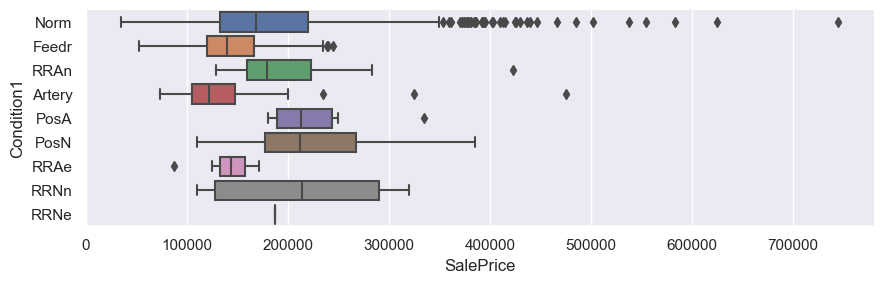


	 Os dados dessa variável estão concentradas todas na mesma faixa.

 Dados estatístico da regressão linear criada com a variável alvo, SalePrice.
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     5.414
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           1.03e-06
Time:                        14:14:43   Log-Likelihood:                -14781.
No. Observations:                1168   AIC:                         2.958e+04
Df Residuals:                    1159   BIC:                         2.963e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|   

In [21]:
nome_feature = 'Condition1'

print('\t Esta variável representa a proximidade do imóvel com alguns pontos de referência.\n')

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Agrupamento dos valores da variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True, prefix = nome_feature)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# print('\n Verificação dos primeiros dados do Data Frame.\n')
# print(df_dummies_auxiliar.head(6))

############################################################################################################
# Criação de um gráfico para facilitar o entendimento da dispersão dos dados

print('\n Box Plot da variável categórica.')

sns.catplot(x = nome_target, y = nome_feature, data = dados_treino, kind = "box", height=3, aspect=3)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()
############################################################################################################

print('\n\t Os dados dessa variável estão concentradas todas na mesma faixa.')

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ Condition1_Feedr + Condition1_Norm + Condition1_PosA + Condition1_PosN + Condition1_RRAe + Condition1_RRAn + Condition1_RRNe + Condition1_RRNn", df_dummies_auxiliar).fit()

print('\n Dados estatístico da regressão linear criada com a variável alvo, SalePrice.')
print(modelo_dummies.summary())

print('Essa variável não será utilizada no modelo, pois os dados da variável estão concentrados na mesma faixa de valores.')

## Condition2 (Categórica)

	 Esta variável representa a proximidade do imóvel quando há mais de um ponto de referência.

Número de valores não válidos: 0

Verficação da disposição da variável agrupada:

Condition2
Artery       2
Feedr        3
Norm      1157
PosA         1
PosN         2
RRAe         1
RRAn         1
RRNn         1
dtype: int64

 Box Plot da variável categórica.


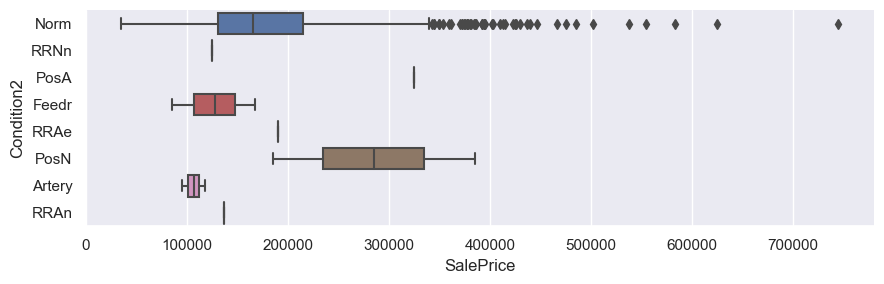

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.620
Date:                Tue, 19 Dec 2023   Prob (F-statistic):              0.126
Time:                        14:14:43   Log-Likelihood:                -14797.
No. Observations:                1168   AIC:                         2.961e+04
Df Residuals:                    1160   BIC:                         2.965e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.065e+05   5.45e+04  

In [22]:
nome_feature = 'Condition2'

print('\t Esta variável representa a proximidade do imóvel quando há mais de um ponto de referência.\n')

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável agrupada:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True, prefix = nome_feature)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# # Verificação do data frame.
# print(df_dummies_auxiliar.head(6))

############################################################################################################
# Criação de um gráfico para facilitar o entendimento da dispersão dos dados

print('\n Box Plot da variável categórica.')

sns.catplot(x = nome_target, y = nome_feature, data = dados_treino, kind = "box", height=3, aspect=3)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()
############################################################################################################

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ Condition2_Feedr + Condition2_Norm + Condition2_PosA + Condition2_PosN + Condition2_RRAe + Condition2_RRAn + Condition2_RRNn", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
print(modelo_dummies.summary())

print('\nSegundo os dados estatísco essa variável só representa 1% da variável dependente. Pouco significativa para a utilização no projeto.')

## BldgType (Categórica)

Variável que indica o tipo de moradia.

Número de valores não válidos: 0

Verficação da disposição da variável agrupada:

BldgType
1Fam      978
2fmCon     29
Duplex     41
Twnhs      32
TwnhsE     88
dtype: int64

 Box Plot da variável categórica.


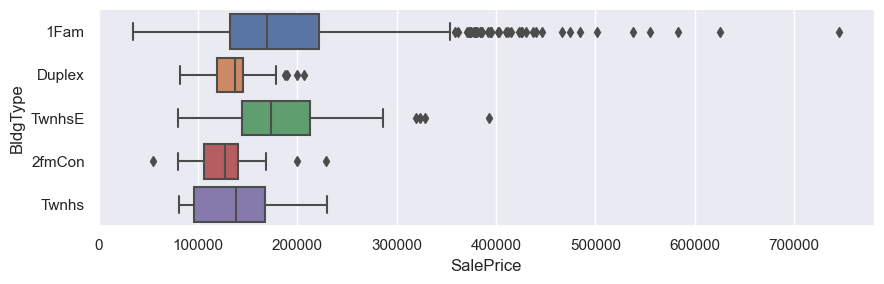


 Verifica-se que não há uma segmentação dos valores da variável categórica, então não será uma boa variávle para a utilização no modelo.

A seguir serão apresentados os dados estatístico no modelo criado.
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     10.93
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           1.06e-08
Time:                        14:14:43   Log-Likelihood:                -14781.
No. Observations:                1168   AIC:                         2.957e+04
Df Residuals:                    1163   BIC:                         2.960e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
    

In [23]:
nome_feature = 'BldgType'

print('Variável que indica o tipo de moradia.\n')

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável agrupada:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True, prefix = nome_feature)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# # Verificação do data frame.
# print(df_dummies_auxiliar.head(6))

############################################################################################################
# Criação de um gráfico para facilitar o entendimento da dispersão dos dados

print('\n Box Plot da variável categórica.')

sns.catplot(x = nome_target, y = nome_feature, data = dados_treino, kind = "box", height=3, aspect=3)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()
############################################################################################################

print('\n Verifica-se que não há uma segmentação dos valores da variável categórica, então não será uma boa variávle para a utilização no modelo.\n')

print('A seguir serão apresentados os dados estatístico no modelo criado.')

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ Q('BldgType_2fmCon') + BldgType_Duplex + BldgType_Twnhs + BldgType_TwnhsE", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
print(modelo_dummies.summary())

# print('\nEssa variável não será utilizada para a construção do modelo.')

################################# ARMAZENAMENTO DAS VARIÁVEIS DICOTÔMICAS ##################################
# Eliminação da coluna da variável dependente
df_dummies_auxiliar.drop(columns = [nome_target], inplace = True)

# Armazenamento dos valores da variável
features_dicotomicas[df_dummies_auxiliar.columns] = df_dummies_auxiliar

## HouseStyle (Categórica)

**Estilo da moradia.**

Variável que indica o estilo de moradia.

Número de valores não válidos: 0

Verficação da disposição da variável agrupada:

HouseStyle
1.5Fin    121
1.5Unf     12
1Story    577
2.5Fin      7
2.5Unf     11
2Story    360
SFoyer     28
SLvl       52
dtype: int64

 Box Plot da variável categórica.


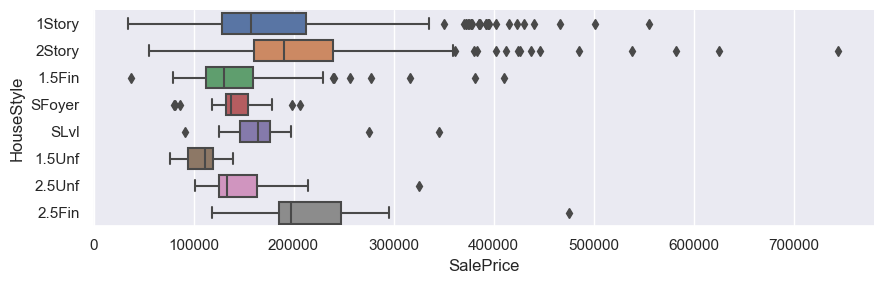


	Dados estatísticos do moledo de n-1 dummies em relação à SalePrice.
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     16.45
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           9.18e-21
Time:                        14:14:44   Log-Likelihood:                -14747.
No. Observations:                1168   AIC:                         2.951e+04
Df Residuals:                    1160   BIC:                         2.955e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

In [24]:
nome_feature = 'HouseStyle'

print('Variável que indica o estilo de moradia.\n')

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')


print('Verficação da disposição da variável agrupada:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True, prefix = nome_feature)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# # Verificação do data frame.
# print(df_dummies_auxiliar.head(6))

############################################################################################################
# Criação de um gráfico para facilitar o entendimento da dispersão dos dados

print('\n Box Plot da variável categórica.')

sns.catplot(x = nome_target, y = nome_feature, data = dados_treino, kind = "box", height=3, aspect=3)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()
############################################################################################################

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ Q('HouseStyle_1.5Unf') + Q('HouseStyle_1Story') + Q('HouseStyle_2.5Fin') + Q('HouseStyle_2.5Unf') + Q('HouseStyle_2Story') + HouseStyle_SFoyer + HouseStyle_SLvl", df_dummies_auxiliar).fit()

print('\n\tDados estatísticos do moledo de n-1 dummies em relação à SalePrice.')
print(modelo_dummies.summary())

print('\nA representatividade dessa variável é menor que 25% da variável dependente, logo não será utilizada no modelo.')

################################# ARMAZENAMENTO DAS VARIÁVEIS DICOTÔMICAS ##################################
# Eliminação da coluna da variável dependente
df_dummies_auxiliar.drop(columns = [nome_target], inplace = True)

# Armazenamento dos valores da variável
features_dicotomicas[df_dummies_auxiliar.columns] = df_dummies_auxiliar

## OverallQual (Numérica)



In [25]:
nome_feature = 'OverallQual'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")




# ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# Armazenamento da feature não transformada.
features_numericas[nome_feature] = dados_treino[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas[nome_feature] = df_ln[nome_feature]

# Armazenamento da feature não transformada.
features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre OverallQual e SalePrice

             OverallQual  SalePrice
OverallQual     1.000000   0.785555
SalePrice       0.785555   1.000000

Correlação entre ln<OverallQual> e ln<SalePrice>

             OverallQual  SalePrice
OverallQual     1.000000   0.783082
SalePrice       0.783082   1.000000

Correlação entre OverallQual e SalePrice SEM OUTLIER

             OverallQual  SalePrice
OverallQual     1.000000   0.784402
SalePrice       0.784402   1.000000

Correlação entre ln<OverallQual> e ln<SalePrice> SEM OUTLIER

             OverallQual  SalePrice
OverallQual     1.000000   0.780921
SalePrice       0.780921   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_out

## OverallCond (Numérica)



In [26]:
nome_feature = 'OverallCond'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre OverallCond e SalePrice

             OverallCond  SalePrice
OverallCond     1.000000  -0.074391
SalePrice      -0.074391   1.000000

Correlação entre ln<OverallCond> e ln<SalePrice>

             OverallCond  SalePrice
OverallCond     1.000000   0.008687
SalePrice       0.008687   1.000000

Correlação entre OverallCond e SalePrice SEM OUTLIER

             OverallCond  SalePrice
OverallCond     1.000000  -0.115216
SalePrice      -0.115216   1.000000

Correlação entre ln<OverallCond> e ln<SalePrice> SEM OUTLIER

             OverallCond  SalePrice
OverallCond     1.000000  -0.031341
SalePrice      -0.031341   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_out

## YearBuilt (Numérica)



In [27]:
nome_feature = 'YearBuilt'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.



print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# Armazenamento da feature não transformada.
features_numericas[nome_feature] = dados_treino[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas[nome_feature] = df_ln[nome_feature]

# Armazenamento da feature não transformada.
features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre YearBuilt e SalePrice

           YearBuilt  SalePrice
YearBuilt   1.000000   0.516501
SalePrice   0.516501   1.000000

Correlação entre ln<YearBuilt> e ln<SalePrice>

           YearBuilt  SalePrice
YearBuilt   1.000000   0.574521
SalePrice   0.574521   1.000000

Correlação entre YearBuilt e SalePrice SEM OUTLIER

           YearBuilt  SalePrice
YearBuilt   1.000000   0.515775
SalePrice   0.515775   1.000000

Correlação entre ln<YearBuilt> e ln<SalePrice> SEM OUTLIER

           YearBuilt  SalePrice
YearBuilt   1.000000   0.573265
SalePrice   0.573265   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

## YearRemodAdd (Numérica)


In [28]:
nome_feature = 'YearRemodAdd'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# Armazenamento da feature não transformada.
features_numericas[nome_feature] = dados_treino[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas[nome_feature] = df_ln[nome_feature]

# Armazenamento da feature não transformada.
features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre YearRemodAdd e SalePrice

              YearRemodAdd  SalePrice
YearRemodAdd      1.000000   0.508593
SalePrice         0.508593   1.000000

Correlação entre ln<YearRemodAdd> e ln<SalePrice>

              YearRemodAdd  SalePrice
YearRemodAdd      1.000000   0.562127
SalePrice         0.562127   1.000000

Correlação entre YearRemodAdd e SalePrice SEM OUTLIER

              YearRemodAdd  SalePrice
YearRemodAdd      1.000000   0.508593
SalePrice         0.508593   1.000000

Correlação entre ln<YearRemodAdd> e ln<SalePrice> SEM OUTLIER

              YearRemodAdd  SalePrice
YearRemodAdd      1.000000   0.562127
SalePrice         0.562127   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de

## RoofStyle (Categórica)

Tipo do telhado.

Variável que indica o tipo de telhado do imóvel
Número de valores não válidos: 0

Verficação da disposição da variável agrupada:

RoofStyle
Flat        11
Gable      906
Gambrel      9
Hip        235
Mansard      5
Shed         2
dtype: int64

 Box Plot da variável categórica.


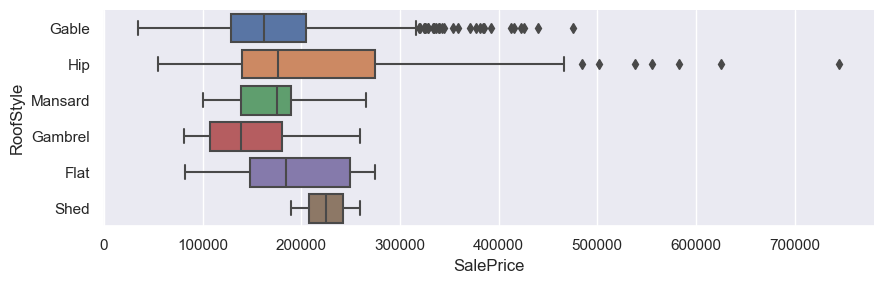

Dados estatísticos da regressão linear de n-1 dummies em relação a SalePrice.
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     14.65
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           6.00e-14
Time:                        14:14:44   Log-Likelihood:                -14767.
No. Observations:                1168   AIC:                         2.955e+04
Df Residuals:                    1162   BIC:                         2.958e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

In [29]:
nome_feature = 'RoofStyle'

print('Variável que indica o tipo de telhado do imóvel')

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

print('Verficação da disposição da variável agrupada:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True, prefix = nome_feature)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# print(df_dummies_auxiliar.head(3))

############################################################################################################
# Criação de um gráfico para facilitar o entendimento da dispersão dos dados

print('\n Box Plot da variável categórica.')

sns.catplot(x = nome_target, y = nome_feature, data = dados_treino, kind = "box", height=3, aspect=3)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()
############################################################################################################

# Estimação do modelo de regressão linear múltipla com n-1 dummies
print('Dados estatísticos da regressão linear de n-1 dummies em relação a SalePrice.')
modelo_dummies = sm.OLS.from_formula("SalePrice ~ RoofStyle_Gable + RoofStyle_Gambrel + RoofStyle_Hip + RoofStyle_Mansard + RoofStyle_Shed", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
print(modelo_dummies.summary())

print('\nAs categorias dessa variável estão todas concentradas na mesma faixa de valores, isso não é vantajoso para a definição da variável dependente.')
print('\nAlém disso ela representou quase 6% da variável dependente na regressão linear formada. Então não será utilizada no modelo.')

################################# ARMAZENAMENTO DAS VARIÁVEIS DICOTÔMICAS ##################################
# Eliminação da coluna da variável dependente
df_dummies_auxiliar.drop(columns = [nome_target], inplace = True)

# Armazenamento dos valores da variável
features_dicotomicas[df_dummies_auxiliar.columns] = df_dummies_auxiliar

## RoofMatl (Categórica)

Material do Telhado

Variável que indica o tipo de material do telhado.

Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:

RoofMatl
ClyTile       1
CompShg    1149
Metal         1
Roll          1
Tar&Grv       9
WdShake       3
WdShngl       4
dtype: int64

É perceptível uma distribuição desproporcional entre os valores dessa variável categórica.

 Box Plot da variável categórica.


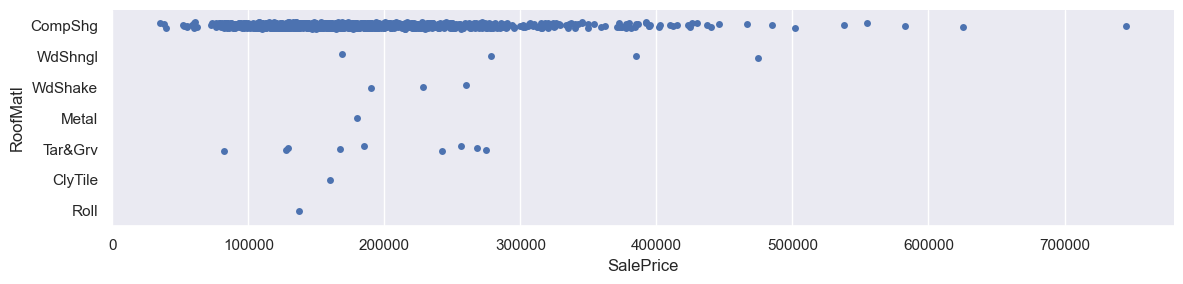

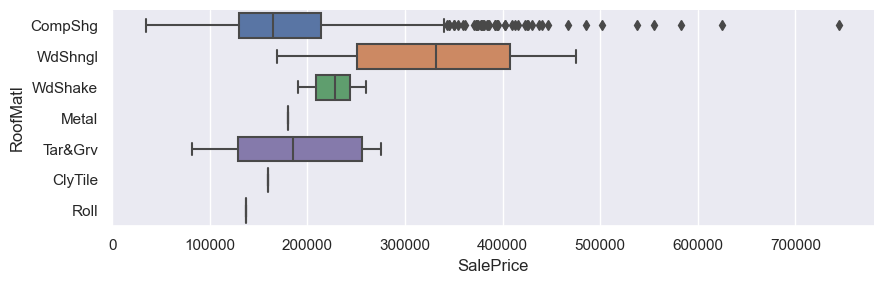


	 Dados estatístico do modelo de regressão linear construído com a variável categórica e a variável dependente.
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.654
Date:                Tue, 19 Dec 2023   Prob (F-statistic):             0.0146
Time:                        14:14:45   Log-Likelihood:                -14795.
No. Observations:                1168   AIC:                         2.960e+04
Df Residuals:                    1161   BIC:                         2.964e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-------

In [30]:
nome_feature = 'RoofMatl'

print('Variável que indica o tipo de material do telhado.\n')

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True, prefix = nome_feature)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# print(df_dummies_auxiliar.head(3))

print('\nÉ perceptível uma distribuição desproporcional entre os valores dessa variável categórica.')

############################################################################################################
# Criação de um gráfico para facilitar o entendimento da dispersão dos dados

sns.catplot(x = nome_target, y = nome_feature, data = dados_treino, height=3, aspect=4)

print('\n Box Plot da variável categórica.')

sns.catplot(x = nome_target, y = nome_feature, data = dados_treino, kind = "box", height=3, aspect=3)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()
############################################################################################################

print('\n\t Dados estatístico do modelo de regressão linear construído com a variável categórica e a variável dependente.')

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ RoofMatl_CompShg + RoofMatl_Metal + RoofMatl_Roll + Q('RoofMatl_Tar&Grv') + RoofMatl_WdShake + RoofMatl_WdShngl", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
print(modelo_dummies.summary())

print('\n\t Essa variável não será selecionada para o modelo.')

## Exterior1st (Categórica)

**Cobertura externa da casa.**

Variável que indica o material da cobertura externa da casa.

Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:

Exterior1st
AsbShng     16
AsphShn      1
BrkComm      2
BrkFace     40
CBlock       1
CemntBd     45
HdBoard    176
ImStucc      1
MetalSd    173
Plywood     81
Stone        1
Stucco      21
VinylSd    420
Wd Sdng    171
WdShing     19
dtype: int64

 Box Plot da variável categórica.


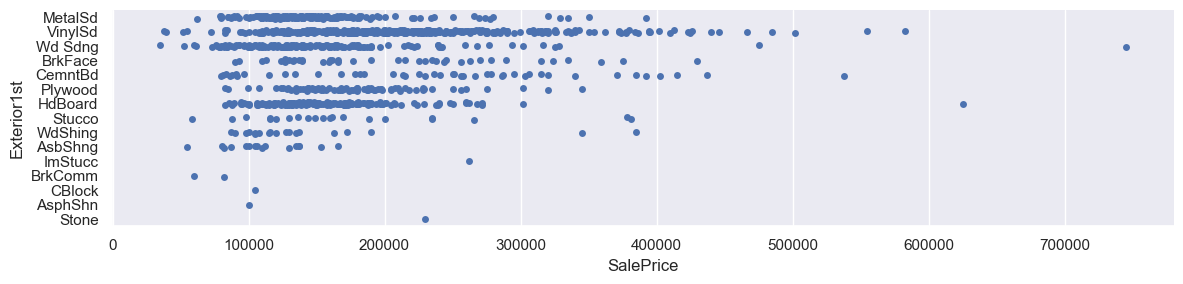

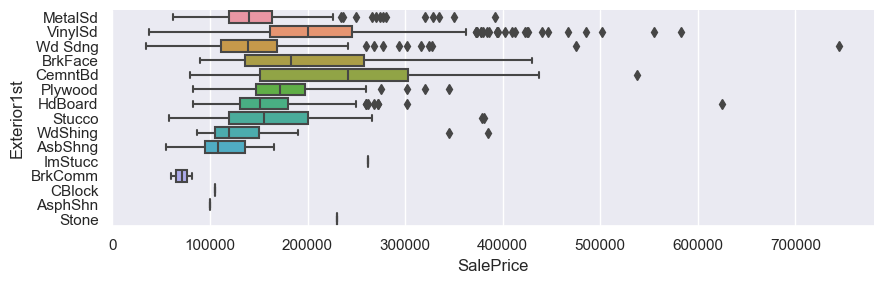

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     16.24
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           9.56e-37
Time:                        14:14:46   Log-Likelihood:                -14698.
No. Observations:                1168   AIC:                         2.943e+04
Df Residuals:                    1153   BIC:                         2.950e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [31]:
nome_feature = 'Exterior1st'

print('Variável que indica o material da cobertura externa da casa.\n')

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True, prefix = nome_feature)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# # Verificação do data frame.
# print(df_dummies_auxiliar.head(6))

############################################################################################################
# Criação de um gráfico para facilitar o entendimento da dispersão dos dados

print('\n Box Plot da variável categórica.')

sns.catplot(x = nome_target, y = nome_feature, data = dados_treino, height=3, aspect=4)

sns.catplot(x = nome_target, y = nome_feature, data = dados_treino, kind = "box", height=3, aspect=3)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()
############################################################################################################

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ Exterior1st_AsphShn + Exterior1st_BrkComm + Exterior1st_BrkFace + Exterior1st_CBlock + Exterior1st_CemntBd + Exterior1st_HdBoard + Exterior1st_ImStucc + Exterior1st_MetalSd + Exterior1st_Plywood + Exterior1st_Stone + Exterior1st_Stucco + Exterior1st_VinylSd + Q('Exterior1st_Wd Sdng') + Exterior1st_WdShing", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
print(modelo_dummies.summary())

# print('\n Inicialmente essa variável não será utilizada no modelo.')

################################# ARMAZENAMENTO DAS VARIÁVEIS DICOTÔMICAS ##################################
# Eliminação da coluna da variável dependente
df_dummies_auxiliar.drop(columns = [nome_target], inplace = True)

# Armazenamento dos valores da variável
features_dicotomicas[df_dummies_auxiliar.columns] = df_dummies_auxiliar

## Exterior2nd (Categórica)

**Cobertura externa da casa, para aquelas possuem mais de um tipo de cobertura.**

Variável que indica o tipo de cobertura para aquelas casas que possuem mais de um tipo de cobetura.

Número de valores não válidos: 0

Verficação da disposição da variável categórica agrupada:

Exterior2nd
AsbShng     17
AsphShn      3
Brk Cmn      6
BrkFace     15
CBlock       1
CmentBd     44
HdBoard    163
ImStucc      6
MetalSd    165
Other        1
Plywood    112
Stone        3
Stucco      23
VinylSd    410
Wd Sdng    165
Wd Shng     34
dtype: int64

 Box Plot da variável categórica.


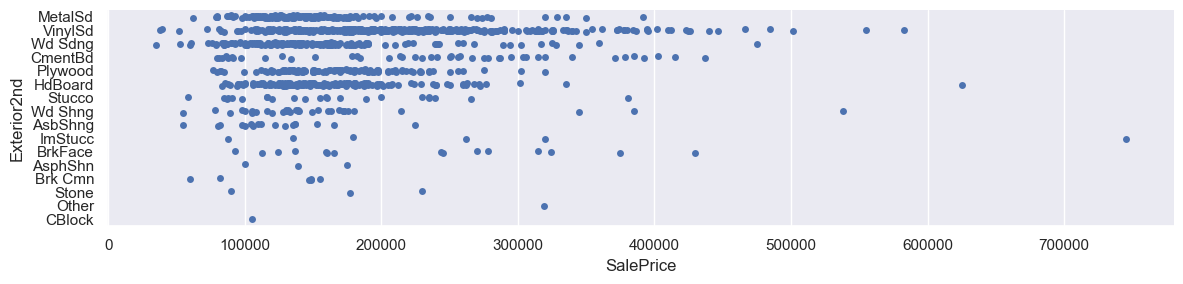

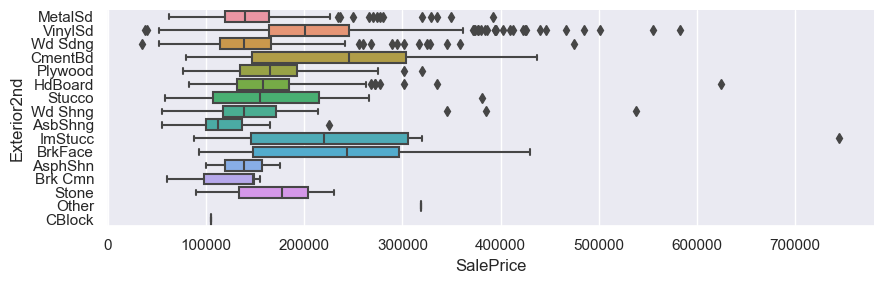


Dados do modelo de regressão linear múltipla para n-1 dummies.

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     15.63
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           2.26e-37
Time:                        14:14:47   Log-Likelihood:                -14694.
No. Observations:                1168   AIC:                         2.942e+04
Df Residuals:                    1152   BIC:                         2.950e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [32]:
nome_feature = 'Exterior2nd'

print('Variável que indica o tipo de cobertura para aquelas casas que possuem mais de um tipo de cobetura.\n')

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

print('Verficação da disposição da variável categórica agrupada:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True, prefix = nome_feature)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# # Verificação do data frame.
# print(df_dummies_auxiliar.head(6))

############################################################################################################
# Criação de um gráfico para facilitar o entendimento da dispersão dos dados

print('\n Box Plot da variável categórica.')

sns.catplot(x = nome_target, y = nome_feature, data = dados_treino, height=3, aspect=4)

sns.catplot(x = nome_target, y = nome_feature, data = dados_treino, kind = "box", height=3, aspect=3)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()
############################################################################################################

print('\nDados do modelo de regressão linear múltipla para n-1 dummies.\n')

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ Exterior2nd_AsphShn + Q('Exterior2nd_Brk Cmn') + Exterior2nd_BrkFace + Exterior2nd_CBlock + Exterior2nd_CmentBd + Exterior2nd_HdBoard + Exterior2nd_ImStucc + Exterior2nd_MetalSd + Exterior2nd_Other + Exterior2nd_Plywood + Exterior2nd_Stone + Exterior2nd_Stucco + Exterior2nd_VinylSd + Q('Exterior2nd_Wd Sdng') + Q('Exterior2nd_Wd Shng')", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
print(modelo_dummies.summary())

# print('\nInicialmente essa variável não será utilizada no modelo.')

################################# ARMAZENAMENTO DAS VARIÁVEIS DICOTÔMICAS ##################################
# Eliminação da coluna da variável dependente
df_dummies_auxiliar.drop(columns = [nome_target], inplace = True)

# Armazenamento dos valores da variável
features_dicotomicas[df_dummies_auxiliar.columns] = df_dummies_auxiliar

## MasVnrType (Categórica)

**Tipo de folheado da alvenaria.**

Número de valores não válidos: 6

Verficação da disposição da variável em agurpamento:

MasVnrType
BrkCmn      13
BrkFace    366
None       677
Stone      106
dtype: int64

Verifcamos que após o agrupamento o valor da moda dessa variável é "None", ou seja, sem folheado na alvenaria. Portanto iremos substituir os valores não válidos pela moda para aliminarmos esses valores dos dados.


 Box Plot da variável categórica.


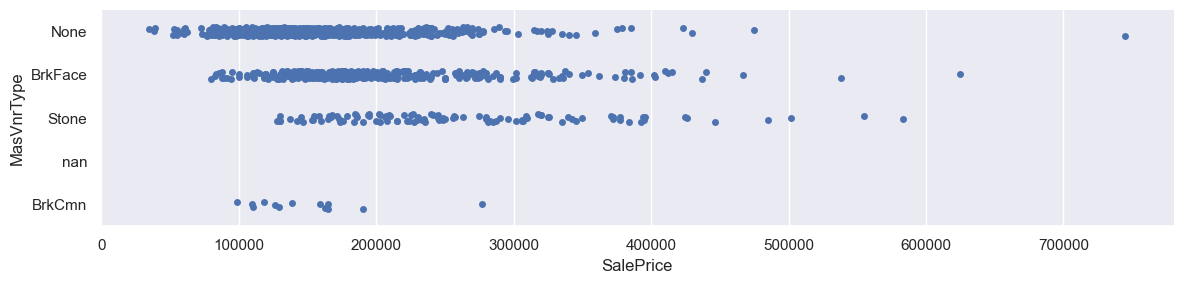

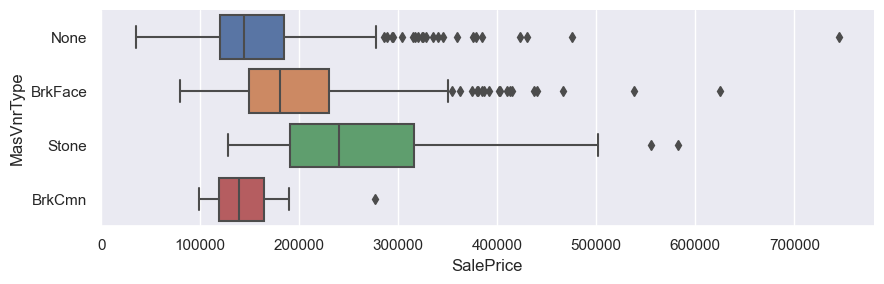

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     79.69
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           6.86e-47
Time:                        14:14:47   Log-Likelihood:                -14694.
No. Observations:                1168   AIC:                         2.940e+04
Df Residuals:                    1164   BIC:                         2.942e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               1.5e+05 

In [33]:
nome_feature = 'MasVnrType'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

print(f'\nVerifcamos que após o agrupamento o valor da moda dessa variável é "None", ou seja, sem folheado na alvenaria. Portanto iremos substituir os valores não válidos pela moda para aliminarmos esses valores dos dados.\n')

# Cópia dos valores que serão manipulados para que os valores originais são sejam alterados.
df_dummies_auxiliar_1 = dados_treino[nome_feature].copy()

# Eliminação dos valores não válidos pelo valor da moda.
df_dummies_auxiliar_1.fillna('None', inplace = True)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(df_dummies_auxiliar_1, columns=[nome_feature], drop_first=True, prefix = nome_feature)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# Verificação do data frame.
# print(df_dummies_auxiliar.head(6))

############################################################################################################
# Criação de um gráfico para facilitar o entendimento da dispersão dos dados

print('\n Box Plot da variável categórica.')

sns.catplot(x = nome_target, y = nome_feature, data = dados_treino, height=3, aspect=4)

sns.catplot(x = nome_target, y = nome_feature, data = dados_treino, kind = "box", height=3, aspect=3)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()
############################################################################################################

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ MasVnrType_BrkFace + Q('MasVnrType_None') + MasVnrType_Stone", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
print(modelo_dummies.summary())

################################# ARMAZENAMENTO DAS VARIÁVEIS DICOTÔMICAS ##################################
# Eliminação da coluna da variável dependente
df_dummies_auxiliar.drop(columns = [nome_target], inplace = True)

# Armazenamento dos valores da variável
features_dicotomicas[df_dummies_auxiliar.columns] = df_dummies_auxiliar

## MasVnrArea (Numérica)


In [34]:
nome_feature = 'MasVnrArea'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Substituição de valores não válidos pela mediana da variável em ambos os data frames.
dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

# Verificação de valores iguais a 0 no data frame e substituição por 1, caso exista.
dados_treino[nome_feature][dados_treino[nome_feature] == 0] = 1

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.



print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# Armazenamento da feature não transformada.
features_numericas[nome_feature] = dados_treino[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas[nome_feature] = df_ln[nome_feature]

# Armazenamento da feature não transformada.
features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 6


Correlação entre MasVnrArea e SalePrice

            MasVnrArea  SalePrice
MasVnrArea    1.000000   0.457608
SalePrice     0.457608   1.000000

Correlação entre ln<MasVnrArea> e ln<SalePrice>

            MasVnrArea  SalePrice
MasVnrArea    1.000000   0.395393
SalePrice     0.395393   1.000000

Correlação entre MasVnrArea e SalePrice SEM OUTLIER

            MasVnrArea  SalePrice
MasVnrArea    1.000000   0.283017
SalePrice     0.283017   1.000000

Correlação entre ln<MasVnrArea> e ln<SalePrice> SEM OUTLIER

            MasVnrArea  SalePrice
MasVnrArea    1.000000   0.289009
SalePrice     0.289009   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da tr

C:\Users\John\AppData\Local\Temp\ipykernel_1436\2547719781.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_treino[nome_feature][dados_treino[nome_feature] == 0] = 1


## ExterQual (Categórica)

**Avaliação do acabamento externo do imóvel.**

Variável que indica o acabamento externo do imóvel.

Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:

ExterQual
Ex     42
Fa     11
Gd    388
TA    727
dtype: int64

 Box Plot da variável categórica.


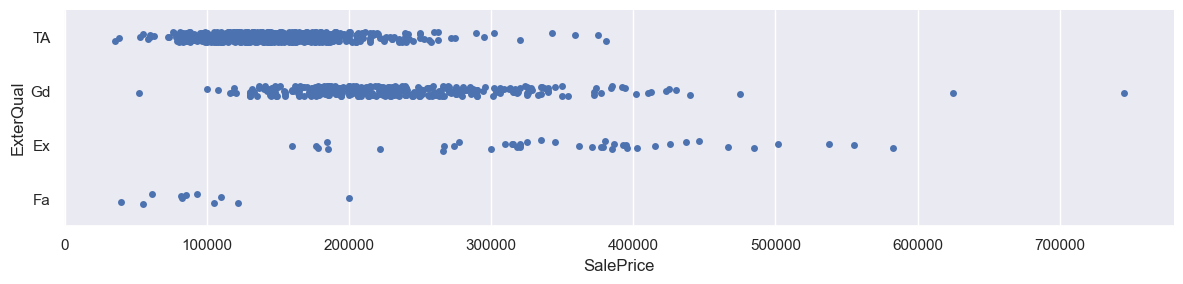

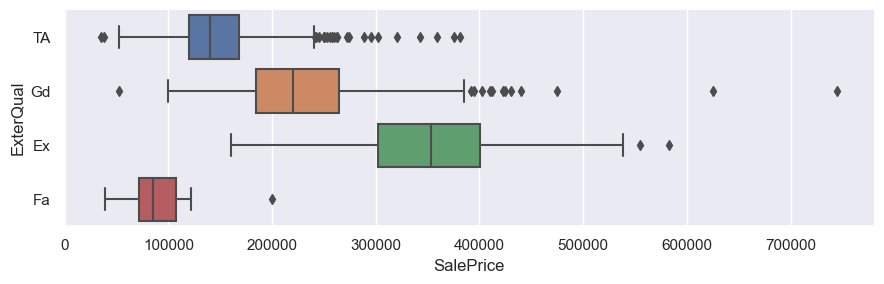

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     318.6
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          5.70e-151
Time:                        15:47:44   Log-Likelihood:                -14453.
No. Observations:                1168   AIC:                         2.891e+04
Df Residuals:                    1164   BIC:                         2.893e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3.522e+05   8846.030     39.814   

In [161]:
nome_feature = 'ExterQual'

print('Variável que indica o acabamento externo do imóvel.\n')

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True, prefix = nome_feature)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# Verificação do data frame.
# print(df_dummies_auxiliar.head(6))

############################################################################################################
# Criação de um gráfico para facilitar o entendimento da dispersão dos dados

print('\n Box Plot da variável categórica.')

sns.catplot(x = nome_target, y = nome_feature, data = dados_treino, height=3, aspect=4)

sns.catplot(x = nome_target, y = nome_feature, data = dados_treino, kind = "box", height=3, aspect=3)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()
############################################################################################################

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ ExterQual_Fa + ExterQual_Gd + ExterQual_TA", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
print(modelo_dummies.summary())

################################# ARMAZENAMENTO DAS VARIÁVEIS DICOTÔMICAS ##################################
# Eliminação da coluna da variável dependente
df_dummies_auxiliar.drop(columns = [nome_target], inplace = True)

# Armazenamento dos valores da variável
features_dicotomicas[df_dummies_auxiliar.columns] = df_dummies_auxiliar

## ExterCond (Categórica)

Avaliação do estadu atual do acabamento externo.

In [36]:
nome_feature = 'ExterCond'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# Verificação do data frame.
print(df_dummies_auxiliar.head(6))

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ Fa + Gd + Po + TA", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:

ExterCond
Ex       3
Fa      24
Gd     122
Po       1
TA    1018
dtype: int64
      Fa  Gd  Po  TA  SalePrice
254    0   1   0   0     145000
1066   0   0   0   1     178000
638    0   0   0   1      85000
799    0   0   0   1     175000
380    0   0   0   1     127000
303    0   0   0   1     149900


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     7.466
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           6.15e-06
Time:                        14:14:47   Log-Likelihood:                -14788.
No. Observations:                1168   AIC:                         2.959e+04
Df Residuals:                    1163   BIC:                         2.961e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.013e+05   4.41e+04      4.563      0.000    1.15e+05    2.88e+05
Fa         -9.285e+04   4.68e+04     -1.984      0.047   -1.85e+05   -1028.780
Gd         -3.354e+04   4.47e+04     -0.751      0.453   -1.21e+05    5.41e+04
Po         -1.248e+05   8.82e+04     -1.415      0.157   -2.98e+05    4.83e+04
TA         -1.649e+04   4.42e+04     -0.373      0.709   -1.03e+05    7.02e+04
==============================================================================
Omnibus:                      456.258   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2216.510
Skew:                           1.776   Prob(JB):                         0.00
Kurtosis:                       8.739   Cond. No.                         65.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Foundation (Categórica)

Tipo de fundação do imóvel

In [37]:
nome_feature = 'Foundation'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)
print()

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(dados_treino[nome_feature], columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# Verificação do data frame.
print(df_dummies_auxiliar.head(6))

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ CBlock + PConc + Slab + Stone + Wood", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:

Foundation
BrkTil    116
CBlock    504
PConc     520
Slab       20
Stone       5
Wood        3
dtype: int64

      CBlock  PConc  Slab  Stone  Wood  SalePrice
254        1      0     0      0     0     145000
1066       0      1     0      0     0     178000
638        1      0     0      0     0      85000
799        0      0     0      0     0     175000
380        0      0     0      0     0     127000
303        0      1     0      0     0     149900


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     77.15
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           6.12e-70
Time:                        14:14:47   Log-Likelihood:                -14635.
No. Observations:                1168   AIC:                         2.928e+04
Df Residuals:                    1162   BIC:                         2.931e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.371e+05   6229.130     22.009      0.000    1.25e+05    1.49e+05
CBlock      1.389e+04   6908.885      2.011      0.045     335.748    2.74e+04
PConc       8.662e+04   6888.969     12.574      0.000    7.31e+04       1e+05
Slab       -3.027e+04   1.62e+04     -1.863      0.063   -6.21e+04    1601.995
Stone        4.15e+04   3.06e+04      1.354      0.176   -1.86e+04    1.02e+05
Wood        4.857e+04   3.92e+04      1.238      0.216   -2.84e+04    1.26e+05
==============================================================================
Omnibus:                      484.220   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3031.966
Skew:                           1.801   Prob(JB):                         0.00
Kurtosis:                      10.023   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## BsmtQual (Categórica)

Altura do porão

In [38]:
nome_feature = 'BsmtQual'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

print(f'\nVerifcamos que após o agrupamento o valor da moda dessa variável é "TA".\n')

# Cópia dos valores que serão manipulados para que os valores originais são sejam alterados.
df_dummies_auxiliar_1 = dados_treino[nome_feature].copy()

# Eliminação dos valores não válidas pelo valor da moda.
df_dummies_auxiliar_1.fillna('TA', inplace = True)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(df_dummies_auxiliar_1, columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# Verificação do data frame.
print(df_dummies_auxiliar.head(6))

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ Fa + Gd + TA", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 28

Verficação da disposição da variável em agurpamento:

BsmtQual
Ex     97
Fa     29
Gd    493
TA    521
dtype: int64

Verifcamos que após o agrupamento o valor da moda dessa variável é "TA".

      Fa  Gd  TA  SalePrice
254    0   0   1     145000
1066   0   1   0     178000
638    1   0   0      85000
799    0   1   0     175000
380    0   0   1     127000
303    0   0   1     149900


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     324.1
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          6.28e-153
Time:                        14:14:47   Log-Likelihood:                -14448.
No. Observations:                1168   AIC:                         2.890e+04
Df Residuals:                    1164   BIC:                         2.892e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.213e+05   5798.336     55.410      0.000     3.1e+05    3.33e+05
Fa         -2.023e+05   1.21e+04    -16.737      0.000   -2.26e+05   -1.79e+05
Gd          -1.18e+05   6343.164    -18.599      0.000    -1.3e+05   -1.06e+05
TA         -1.809e+05   6289.751    -28.759      0.000   -1.93e+05   -1.69e+05
==============================================================================
Omnibus:                      379.239   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2387.778
Skew:                           1.349   Prob(JB):                         0.00
Kurtosis:                       9.464   Cond. No.                         9.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## BsmtCond (Categórica)

Condição geral do porão

In [39]:
nome_feature = 'BsmtCond'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

print(f'\nVerifcamos que após o agrupamento o valor da moda dessa variável é "TA".\n')

# Cópia dos valores que serão manipulados para que os valores originais são sejam alterados.
df_dummies_auxiliar_1 = dados_treino[nome_feature].copy()

# Eliminação dos valores não válidas pelo valor da moda.
df_dummies_auxiliar_1.fillna('TA', inplace = True)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(df_dummies_auxiliar_1, columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# Verificação do data frame.
print(df_dummies_auxiliar.head(6))

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ Gd + Po + TA", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 28

Verficação da disposição da variável em agurpamento:

BsmtCond
Fa      39
Gd      55
Po       1
TA    1045
dtype: int64

Verifcamos que após o agrupamento o valor da moda dessa variável é "TA".

      Gd  Po  TA  SalePrice
254    0   0   1     145000
1066   0   0   1     178000
638    0   0   1      85000
799    0   0   1     175000
380    0   0   1     127000
303    0   0   1     149900


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     11.48
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           2.03e-07
Time:                        14:14:47   Log-Likelihood:                -14786.
No. Observations:                1168   AIC:                         2.958e+04
Df Residuals:                    1164   BIC:                         2.960e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.219e+05   1.22e+04      9.987      0.000     9.8e+04    1.46e+05
Gd          8.871e+04    1.6e+04      5.558      0.000    5.74e+04     1.2e+05
Po         -6.093e+04   7.72e+04     -0.789      0.430   -2.12e+05    9.06e+04
TA          6.029e+04   1.24e+04      4.851      0.000    3.59e+04    8.47e+04
==============================================================================
Omnibus:                      459.730   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2243.525
Skew:                           1.790   Prob(JB):                         0.00
Kurtosis:                       8.770   Cond. No.                         47.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## BsmtExposure (Categórica)

Condições das paredes do térreo ou do jardim.

In [40]:
nome_feature = 'BsmtExposure'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

print(f'\nVerifcamos que após o agrupamento o valor da moda dessa variável é "No".\n')

# Cópia dos valores que serão manipulados para que os valores originais são sejam alterados.
df_dummies_auxiliar_1 = dados_treino[nome_feature].copy()

# Eliminação dos valores não válidas pelo valor da moda.
df_dummies_auxiliar_1.fillna('No', inplace = True)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(df_dummies_auxiliar_1, columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# Verificação do data frame.
print(df_dummies_auxiliar.head(6))

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ Gd + Mn + No", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 28

Verficação da disposição da variável em agurpamento:

BsmtExposure
Av    175
Gd    103
Mn     93
No    769
dtype: int64

Verifcamos que após o agrupamento o valor da moda dessa variável é "No".

      Gd  Mn  No  SalePrice
254    0   0   1     145000
1066   0   0   1     178000
638    0   0   1      85000
799    0   0   1     175000
380    0   0   1     127000
303    0   0   1     149900


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     55.00
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           3.02e-33
Time:                        14:14:48   Log-Likelihood:                -14725.
No. Observations:                1168   AIC:                         2.946e+04
Df Residuals:                    1164   BIC:                         2.948e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.128e+05   5473.067     38.886      0.000    2.02e+05    2.24e+05
Gd           3.37e+04   8991.550      3.748      0.000    1.61e+04    5.13e+04
Mn         -1.582e+04   9290.877     -1.703      0.089   -3.41e+04    2407.462
No         -4.851e+04   6044.143     -8.025      0.000   -6.04e+04   -3.66e+04
==============================================================================
Omnibus:                      380.622   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1556.939
Skew:                           1.508   Prob(JB):                         0.00
Kurtosis:                       7.786   Cond. No.                         7.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## BsmtFinType1 (Categórica)

Classificação da área finalizada do porão.

In [41]:
nome_feature = 'BsmtFinType1'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

print(f'\nVerifcamos que após o agrupamento o valor da moda dessa variável é "Unf".\n')

# Cópia dos valores que serão manipulados para que os valores originais são sejam alterados.
df_dummies_auxiliar_1 = dados_treino[nome_feature].copy()

# Eliminação dos valores não válidas pelo valor da moda.
df_dummies_auxiliar_1.fillna('Unf', inplace = True)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(df_dummies_auxiliar_1, columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# Verificação do data frame.
print(df_dummies_auxiliar.head(6))

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ BLQ + GLQ + LwQ + Rec + Unf", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 28

Verficação da disposição da variável em agurpamento:

BsmtFinType1
ALQ    178
BLQ    123
GLQ    328
LwQ     62
Rec    104
Unf    345
dtype: int64

Verifcamos que após o agrupamento o valor da moda dessa variável é "Unf".

      BLQ  GLQ  LwQ  Rec  Unf  SalePrice
254     0    0    0    1    0     145000
1066    0    0    0    0    1     178000
638     0    0    0    0    1      85000
799     0    0    0    0    0     175000
380     0    0    1    0    0     127000
303     0    0    0    0    0     149900


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     54.57
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           5.37e-51
Time:                        14:14:48   Log-Likelihood:                -14679.
No. Observations:                1168   AIC:                         2.937e+04
Df Residuals:                    1162   BIC:                         2.940e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.609e+05   5222.749     30.817      0.000    1.51e+05    1.71e+05
BLQ        -9070.2213   8170.147     -1.110      0.267   -2.51e+04    6959.669
GLQ         7.318e+04   6486.904     11.282      0.000    6.05e+04    8.59e+04
LwQ        -1.078e+04   1.03e+04     -1.049      0.295   -3.09e+04    9385.610
Rec        -1.264e+04   8600.170     -1.470      0.142   -2.95e+04    4232.963
Unf         8127.7457   6347.761      1.280      0.201   -4326.609    2.06e+04
==============================================================================
Omnibus:                      440.874   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2358.867
Skew:                           1.668   Prob(JB):                         0.00
Kurtosis:                       9.110   Cond. No.                         7.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## BsmtFinSF1 (Numérica)


In [42]:
nome_feature = 'BsmtFinSF1'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

# df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

# df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# Armazenamento da feature não transformada.
features_numericas[nome_feature] = dados_treino[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas[nome_feature] = df_ln[nome_feature]

# Armazenamento da feature não transformada.
features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre BsmtFinSF1 e SalePrice

            BsmtFinSF1  SalePrice
BsmtFinSF1     1.00000    0.35946
SalePrice      0.35946    1.00000

Correlação entre ln<BsmtFinSF1> e ln<SalePrice>

            BsmtFinSF1  SalePrice
BsmtFinSF1    1.000000   0.181611
SalePrice     0.181611   1.000000

Correlação entre BsmtFinSF1 e SalePrice SEM OUTLIER

            BsmtFinSF1  SalePrice
BsmtFinSF1    1.000000   0.335119
SalePrice     0.335119   1.000000

Correlação entre ln<BsmtFinSF1> e ln<SalePrice> SEM OUTLIER

            BsmtFinSF1  SalePrice
BsmtFinSF1    1.000000   0.175794
SalePrice     0.175794   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da tr

C:\Users\John\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\John\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## BsmtFinType2 (Categórica)

Classificação da área finalizada do porão (se houver múltiplos tipos)

In [43]:
nome_feature = 'BsmtFinType2'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

print(f'\nApós o agrupamento é possivel afirmar que a moda dessa variável é "Unf".\n')

# Cópia dos valores que serão manipulados para que os valores originais são sejam alterados.
df_dummies_auxiliar_1 = dados_treino[nome_feature].copy()

# Eliminação dos valores não válidas pelo valor da moda.
df_dummies_auxiliar_1.fillna('Unf', inplace = True)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(df_dummies_auxiliar_1, columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# Verificação do data frame.
print(df_dummies_auxiliar.head(6))

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ BLQ + GLQ + LwQ + Rec + Unf", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 28

Verficação da disposição da variável em agurpamento:

BsmtFinType2
ALQ      17
BLQ      22
GLQ      10
LwQ      36
Rec      46
Unf    1009
dtype: int64

Após o agrupamento é possivel afirmar que a moda dessa variável é "Unf".

      BLQ  GLQ  LwQ  Rec  Unf  SalePrice
254     0    0    0    0    1     145000
1066    0    0    0    0    1     178000
638     0    0    0    0    1      85000
799     0    0    0    0    1     175000
380     0    0    0    0    1     127000
303     0    0    0    0    1     149900


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.638
Date:                Tue, 19 Dec 2023   Prob (F-statistic):              0.147
Time:                        14:14:48   Log-Likelihood:                -14799.
No. Observations:                1168   AIC:                         2.961e+04
Df Residuals:                    1162   BIC:                         2.964e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.094e+05   1.87e+04     11.189      0.000    1.73e+05    2.46e+05
BLQ        -5.137e+04   2.49e+04     -2.062      0.039      -1e+05   -2482.160
GLQ        -1.127e+04   3.07e+04     -0.366      0.714   -7.16e+04    4.91e+04
LwQ        -4.521e+04   2.27e+04     -1.991      0.047   -8.98e+04    -656.854
Rec        -4.169e+04   2.19e+04     -1.903      0.057   -8.47e+04    1281.436
Unf        -2.687e+04   1.89e+04     -1.424      0.155   -6.39e+04    1.01e+04
==============================================================================
Omnibus:                      436.282   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1973.905
Skew:                           1.714   Prob(JB):                         0.00
Kurtosis:                       8.367   Cond. No.                         28.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## BsmtFinSF2 (Numérica)


In [44]:
nome_feature = 'BsmtFinSF2'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

# df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

# df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre BsmtFinSF2 e SalePrice

            BsmtFinSF2  SalePrice
BsmtFinSF2    1.000000  -0.005731
SalePrice    -0.005731   1.000000

Correlação entre ln<BsmtFinSF2> e ln<SalePrice>

            BsmtFinSF2  SalePrice
BsmtFinSF2    1.000000  -0.016641
SalePrice    -0.016641   1.000000

Correlação entre BsmtFinSF2 e SalePrice SEM OUTLIER

            BsmtFinSF2  SalePrice
BsmtFinSF2    1.000000  -0.076548
SalePrice    -0.076548   1.000000

Correlação entre ln<BsmtFinSF2> e ln<SalePrice> SEM OUTLIER

            BsmtFinSF2  SalePrice
BsmtFinSF2    1.000000  -0.055942
SalePrice    -0.055942   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da tr

C:\Users\John\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\John\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## BsmtUnfSF (Numérica)


In [45]:
nome_feature = 'BsmtUnfSF'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre BsmtUnfSF e SalePrice

           BsmtUnfSF  SalePrice
BsmtUnfSF   1.000000   0.222487
SalePrice   0.222487   1.000000

Correlação entre ln<BsmtUnfSF> e ln<SalePrice>

           BsmtUnfSF  SalePrice
BsmtUnfSF   1.000000   0.094597
SalePrice   0.094597   1.000000

Correlação entre BsmtUnfSF e SalePrice SEM OUTLIER

           BsmtUnfSF  SalePrice
BsmtUnfSF   1.000000   0.162155
SalePrice   0.162155   1.000000

Correlação entre ln<BsmtUnfSF> e ln<SalePrice> SEM OUTLIER

           BsmtUnfSF  SalePrice
BsmtUnfSF   1.000000   0.067187
SalePrice   0.067187   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 92

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 

## TotalBsmtSF (Numérica)


In [46]:
nome_feature = 'TotalBsmtSF'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre TotalBsmtSF e SalePrice

             TotalBsmtSF  SalePrice
TotalBsmtSF     1.000000   0.597766
SalePrice       0.597766   1.000000

Correlação entre ln<TotalBsmtSF> e ln<SalePrice>

             TotalBsmtSF  SalePrice
TotalBsmtSF     1.000000   0.591487
SalePrice       0.591487   1.000000

Correlação entre TotalBsmtSF e SalePrice SEM OUTLIER

             TotalBsmtSF  SalePrice
TotalBsmtSF     1.000000   0.588824
SalePrice       0.588824   1.000000

Correlação entre ln<TotalBsmtSF> e ln<SalePrice> SEM OUTLIER

             TotalBsmtSF  SalePrice
TotalBsmtSF     1.000000   0.574535
SalePrice       0.574535   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 28

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_ou

## Heating (Categórica)

Tipo de sistema de aquecimento do imóvel

In [47]:
nome_feature = 'Heating'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# print(f'\nVerifcamos que após o agrupamento o valor da moda dessa variável é "No".\n')

# Cópia dos valores que serão manipulados para que os valores originais são sejam alterados.
df_dummies_auxiliar_1 = dados_treino[nome_feature].copy()

# # Eliminação dos valores não válidas pelo valor da moda.
# df_dummies_auxiliar_1.fillna('No', inplace = True)

print(f'\nPrimeiros valores do Data Frame criado.\n')

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(df_dummies_auxiliar_1, columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# Verificação do data frame.
print(df_dummies_auxiliar.head(6))

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ GasA + GasW + Grav + OthW + Wall", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:

Heating
Floor       1
GasA     1140
GasW       15
Grav        6
OthW        2
Wall        4
dtype: int64

Primeiros valores do Data Frame criado.

      GasA  GasW  Grav  OthW  Wall  SalePrice
254      1     0     0     0     0     145000
1066     1     0     0     0     0     178000
638      1     0     0     0     0      85000
799      1     0     0     0     0     175000
380      1     0     0     0     0     127000
303      1     0     0     0     0     149900


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     4.021
Date:                Tue, 19 Dec 2023   Prob (F-statistic):            0.00127
Time:                        14:14:48   Log-Likelihood:                -14793.
No. Observations:                1168   AIC:                         2.960e+04
Df Residuals:                    1162   BIC:                         2.963e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    7.25e+04   7.68e+04      0.944      0.345   -7.81e+04    2.23e+05
GasA        1.102e+05   7.68e+04      1.434      0.152   -4.05e+04    2.61e+05
GasW        9.636e+04   7.93e+04      1.215      0.224   -5.92e+04    2.52e+05
Grav        5316.6667   8.29e+04      0.064      0.949   -1.57e+05    1.68e+05
OthW        5.325e+04    9.4e+04      0.566      0.571   -1.31e+05    2.38e+05
Wall         1.96e+04   8.58e+04      0.228      0.819   -1.49e+05    1.88e+05
==============================================================================
Omnibus:                      452.582   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2137.591
Skew:                           1.771   Prob(JB):                         0.00
Kurtosis:                       8.602   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## HeatingQC (Categórica)

Qualidade do sistema de aquecimento

In [48]:
nome_feature = 'HeatingQC'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Agrupamento para facilitar a visualização da variável.
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Cópia dos valores que serão manipulados para que os valores originais são sejam alterados.
df_dummies_auxiliar_1 = dados_treino[nome_feature].copy()

print(f'\nPrimeiros valores do Data Frame criado.\n')

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(df_dummies_auxiliar_1, columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# Verificação do data frame.
print(df_dummies_auxiliar.head(6))

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ Fa + Gd + Po + TA", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:

HeatingQC
Ex    583
Fa     42
Gd    195
Po      1
TA    347
dtype: int64

Primeiros valores do Data Frame criado.

      Fa  Gd  Po  TA  SalePrice
254    0   0   0   1     145000
1066   0   1   0   0     178000
638    0   1   0   0      85000
799    0   0   0   0     175000
380    0   0   0   1     127000
303    0   0   0   1     149900


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     77.81
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           1.60e-58
Time:                        14:14:48   Log-Likelihood:                -14664.
No. Observations:                1168   AIC:                         2.934e+04
Df Residuals:                    1163   BIC:                         2.936e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.165e+05   2847.021     76.062      0.000    2.11e+05    2.22e+05
Fa         -8.878e+04    1.1e+04     -8.084      0.000    -1.1e+05   -6.72e+04
Gd         -6.116e+04   5686.738    -10.754      0.000   -7.23e+04      -5e+04
Po         -1.295e+05   6.88e+04     -1.883      0.060   -2.65e+05    5439.403
TA         -7.268e+04   4660.875    -15.595      0.000   -8.18e+04   -6.35e+04
==============================================================================
Omnibus:                      456.479   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2519.316
Skew:                           1.726   Prob(JB):                         0.00
Kurtosis:                       9.313   Cond. No.                         36.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## CentralAir (Categórica)

Existência de central de ar no imóvel

In [49]:
nome_feature = 'CentralAir'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

print(f'\nEssa variável já é uma variável dicotômica, mas não em valores numéricos, então será convertida para valores binários, 0 e 1.\n')

# Cópia dos valores que serão manipulados para que os valores originais são sejam alterados.
df_dummies_auxiliar_1 = dados_treino[nome_feature].copy()

print(f'\nPrimeiros valores do Data Frame criado.\n')

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(df_dummies_auxiliar_1, columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# Verificação do data frame.
print(df_dummies_auxiliar.head(6))

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ Y", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:

CentralAir
N      83
Y    1085
dtype: int64

Essa variável já é uma variável dicotômica, mas não em valores numéricos, então será convertida para valores binários, 0 e 1.


Primeiros valores do Data Frame criado.

      Y  SalePrice
254   1     145000
1066  1     178000
638   1      85000
799   1     175000
380   1     127000
303   1     149900


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     89.83
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           1.40e-20
Time:                        14:14:48   Log-Likelihood:                -14759.
No. Observations:                1168   AIC:                         2.952e+04
Df Residuals:                    1166   BIC:                         2.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.068e+05   8175.355     13.059      0.000    9.07e+04    1.23e+05
Y           8.039e+04   8482.292      9.478      0.000    6.37e+04     9.7e+04
==============================================================================
Omnibus:                      477.592   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2456.866
Skew:                           1.849   Prob(JB):                         0.00
Kurtosis:                       9.066   Cond. No.                         7.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Electrical (Categórica)

Sistema elétrico no imóvel

In [50]:
nome_feature = 'Electrical'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

print(f'\nApós o agrupamento é possivel afirmar que a moda dessa variável é "SBrkr".\n')

# Cópia dos valores que serão manipulados para que os valores originais são sejam alterados.
df_dummies_auxiliar_1 = dados_treino[nome_feature].copy()

# Eliminação dos valores não válidas pelo valor da moda.
df_dummies_auxiliar_1.fillna('SBrkr', inplace = True)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(df_dummies_auxiliar_1, columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

# Verificação do data frame.
print(df_dummies_auxiliar.head(6))

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ FuseF + FuseP + SBrkr", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 1

Verficação da disposição da variável em agurpamento:

Electrical
FuseA      69
FuseF      24
FuseP       3
SBrkr    1071
dtype: int64

Após o agrupamento é possivel afirmar que a moda dessa variável é "SBrkr".

      FuseF  FuseP  SBrkr  SalePrice
254       0      0      1     145000
1066      0      0      1     178000
638       0      0      0      85000
799       0      0      1     175000
380       0      0      1     127000
303       0      0      1     149900


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     23.59
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           8.01e-15
Time:                        14:14:48   Log-Likelihood:                -14768.
No. Observations:                1168   AIC:                         2.954e+04
Df Residuals:                    1164   BIC:                         2.956e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.25e+05   9042.618     13.823      0.000    1.07e+05    1.43e+05
FuseF      -1.596e+04   1.78e+04     -0.897      0.370   -5.09e+04     1.9e+04
FuseP      -2.766e+04   4.43e+04     -0.624      0.533   -1.15e+05    5.93e+04
SBrkr       6.194e+04   9329.098      6.639      0.000    4.36e+04    8.02e+04
==============================================================================
Omnibus:                      459.044   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2280.702
Skew:                           1.779   Prob(JB):                         0.00
Kurtosis:                       8.848   Cond. No.                         27.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 1stFlrSF (Numérica)


In [51]:
nome_feature = '1stFlrSF'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# Armazenamento da feature não transformada.
features_numericas[nome_feature] = dados_treino[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas[nome_feature] = df_ln[nome_feature]

# Armazenamento da feature não transformada.
features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre 1stFlrSF e SalePrice

           1stFlrSF  SalePrice
1stFlrSF   1.000000   0.587883
SalePrice  0.587883   1.000000

Correlação entre ln<1stFlrSF> e ln<SalePrice>

           1stFlrSF  SalePrice
1stFlrSF     1.0000     0.5952
SalePrice    0.5952     1.0000

Correlação entre 1stFlrSF e SalePrice SEM OUTLIER

           1stFlrSF  SalePrice
1stFlrSF   1.000000   0.565735
SalePrice  0.565735   1.000000

Correlação entre ln<1stFlrSF> e ln<SalePrice> SEM OUTLIER

           1stFlrSF  SalePrice
1stFlrSF   1.000000   0.578566
SalePrice  0.578566   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0



## 2ndFlrSF (Numérica)


In [52]:
nome_feature = '2ndFlrSF'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

# df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

# df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# Armazenamento da feature não transformada.
features_numericas[nome_feature] = dados_treino[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas[nome_feature] = df_ln[nome_feature]

# Armazenamento da feature não transformada.
features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre 2ndFlrSF e SalePrice

           2ndFlrSF  SalePrice
2ndFlrSF    1.00000    0.31403
SalePrice   0.31403    1.00000

Correlação entre ln<2ndFlrSF> e ln<SalePrice>

           2ndFlrSF  SalePrice
2ndFlrSF   1.000000   0.176861
SalePrice  0.176861   1.000000

Correlação entre 2ndFlrSF e SalePrice SEM OUTLIER

           2ndFlrSF  SalePrice
2ndFlrSF   1.000000   0.159783
SalePrice  0.159783   1.000000

Correlação entre ln<2ndFlrSF> e ln<SalePrice> SEM OUTLIER

           2ndFlrSF  SalePrice
2ndFlrSF   1.000000   0.092806
SalePrice  0.092806   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0



C:\Users\John\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\John\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## LowQualFinSF (Numérica)


In [53]:
nome_feature = 'LowQualFinSF'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre LowQualFinSF e SalePrice

              LowQualFinSF  SalePrice
LowQualFinSF      1.000000  -0.011189
SalePrice        -0.011189   1.000000

Correlação entre ln<LowQualFinSF> e ln<SalePrice>

              LowQualFinSF  SalePrice
LowQualFinSF         1.000      0.139
SalePrice            0.139      1.000

Correlação entre LowQualFinSF e SalePrice SEM OUTLIER

              LowQualFinSF  SalePrice
LowQualFinSF       1.00000   -0.03101
SalePrice         -0.03101    1.00000

Correlação entre ln<LowQualFinSF> e ln<SalePrice> SEM OUTLIER

              LowQualFinSF  SalePrice
LowQualFinSF      1.000000  -0.985088
SalePrice        -0.985088   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 1147

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade

## GrLivArea (Numérica)


In [54]:
nome_feature = 'GrLivArea'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# Armazenamento da feature não transformada.
features_numericas[nome_feature] = dados_treino[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas[nome_feature] = df_ln[nome_feature]

# Armazenamento da feature não transformada.
features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre GrLivArea e SalePrice

           GrLivArea  SalePrice
GrLivArea   1.000000   0.695652
SalePrice   0.695652   1.000000

Correlação entre ln<GrLivArea> e ln<SalePrice>

           GrLivArea  SalePrice
GrLivArea   1.000000   0.723571
SalePrice   0.723571   1.000000

Correlação entre GrLivArea e SalePrice SEM OUTLIER

           GrLivArea  SalePrice
GrLivArea   1.000000   0.641881
SalePrice   0.641881   1.000000

Correlação entre ln<GrLivArea> e ln<SalePrice> SEM OUTLIER

           GrLivArea  SalePrice
GrLivArea   1.000000   0.696854
SalePrice   0.696854   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

## BsmtFullBath (Numérica)


In [55]:
nome_feature = 'BsmtFullBath'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

# df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

# df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# Armazenamento da feature não transformada.
features_numericas[nome_feature] = dados_treino[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas[nome_feature] = df_ln[nome_feature]

# Armazenamento da feature não transformada.
features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre BsmtFullBath e SalePrice

              BsmtFullBath  SalePrice
BsmtFullBath      1.000000   0.226346
SalePrice         0.226346   1.000000

Correlação entre ln<BsmtFullBath> e ln<SalePrice>

              BsmtFullBath  SalePrice
BsmtFullBath      1.000000  -0.220187
SalePrice        -0.220187   1.000000

Correlação entre BsmtFullBath e SalePrice SEM OUTLIER

              BsmtFullBath  SalePrice
BsmtFullBath      1.000000   0.211912
SalePrice         0.211912   1.000000

Correlação entre ln<BsmtFullBath> e ln<SalePrice> SEM OUTLIER

              BsmtFullBath  SalePrice
BsmtFullBath      1.000000  -0.215058
SalePrice        -0.215058   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de

C:\Users\John\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\John\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## BsmtHalfBath (Numérica)


In [56]:
nome_feature = 'BsmtHalfBath'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Substituição de valores não válidos pela mediana da variável em ambos os data frames.
dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre BsmtHalfBath e SalePrice

              BsmtHalfBath  SalePrice
BsmtHalfBath      1.000000  -0.048346
SalePrice        -0.048346   1.000000

Correlação entre ln<BsmtHalfBath> e ln<SalePrice>

              BsmtHalfBath  SalePrice
BsmtHalfBath      1.000000  -0.106844
SalePrice        -0.106844   1.000000

Correlação entre BsmtHalfBath e SalePrice SEM OUTLIER

              BsmtHalfBath  SalePrice
BsmtHalfBath           NaN        NaN
SalePrice              NaN        1.0

Correlação entre ln<BsmtHalfBath> e ln<SalePrice> SEM OUTLIER

              BsmtHalfBath  SalePrice
BsmtHalfBath           NaN        NaN
SalePrice              NaN        1.0

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 1102

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade

## FullBath (Numérica)


In [57]:
nome_feature = 'FullBath'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

# df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

# df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# Armazenamento da feature não transformada.
features_numericas[nome_feature] = dados_treino[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas[nome_feature] = df_ln[nome_feature]

# Armazenamento da feature não transformada.
features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre FullBath e SalePrice

           FullBath  SalePrice
FullBath   1.000000   0.552546
SalePrice  0.552546   1.000000

Correlação entre ln<FullBath> e ln<SalePrice>

           FullBath  SalePrice
FullBath   1.000000   0.587653
SalePrice  0.587653   1.000000

Correlação entre FullBath e SalePrice SEM OUTLIER

           FullBath  SalePrice
FullBath   1.000000   0.565991
SalePrice  0.565991   1.000000

Correlação entre ln<FullBath> e ln<SalePrice> SEM OUTLIER

           FullBath  SalePrice
FullBath   1.000000   0.590311
SalePrice  0.590311   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0



C:\Users\John\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## HalfBath (Numérica)


In [58]:
nome_feature = 'HalfBath'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

# df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

# df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# Armazenamento da feature não transformada.
features_numericas[nome_feature] = dados_treino[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas[nome_feature] = df_ln[nome_feature]

# Armazenamento da feature não transformada.
features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre HalfBath e SalePrice

           HalfBath  SalePrice
HalfBath   1.000000   0.280481
SalePrice  0.280481   1.000000

Correlação entre ln<HalfBath> e ln<SalePrice>

           HalfBath  SalePrice
HalfBath   1.000000  -0.323502
SalePrice -0.323502   1.000000

Correlação entre HalfBath e SalePrice SEM OUTLIER

           HalfBath  SalePrice
HalfBath    1.00000    0.29436
SalePrice   0.29436    1.00000

Correlação entre ln<HalfBath> e ln<SalePrice> SEM OUTLIER

           HalfBath  SalePrice
HalfBath   1.000000  -0.322743
SalePrice -0.322743   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0



C:\Users\John\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\John\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## BedroomAbvGr (Numérica)


In [59]:
nome_feature = 'BedroomAbvGr'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

# df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

# df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# Armazenamento da feature não transformada.
features_numericas[nome_feature] = dados_treino[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas[nome_feature] = df_ln[nome_feature]

# Armazenamento da feature não transformada.
features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre BedroomAbvGr e SalePrice

              BedroomAbvGr  SalePrice
BedroomAbvGr      1.000000   0.156211
SalePrice         0.156211   1.000000

Correlação entre ln<BedroomAbvGr> e ln<SalePrice>

              BedroomAbvGr  SalePrice
BedroomAbvGr      1.000000   0.202308
SalePrice         0.202308   1.000000

Correlação entre BedroomAbvGr e SalePrice SEM OUTLIER

              BedroomAbvGr  SalePrice
BedroomAbvGr      1.000000   0.194383
SalePrice         0.194383   1.000000

Correlação entre ln<BedroomAbvGr> e ln<SalePrice> SEM OUTLIER

              BedroomAbvGr  SalePrice
BedroomAbvGr      1.000000   0.212133
SalePrice         0.212133   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de

C:\Users\John\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## KitchenAbvGr (Numérica)


In [60]:
nome_feature = 'KitchenAbvGr'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

# df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

# df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre KitchenAbvGr e SalePrice

              KitchenAbvGr  SalePrice
KitchenAbvGr      1.000000  -0.142785
SalePrice        -0.142785   1.000000

Correlação entre ln<KitchenAbvGr> e ln<SalePrice>

              KitchenAbvGr  SalePrice
KitchenAbvGr      1.000000  -0.163506
SalePrice        -0.163506   1.000000

Correlação entre KitchenAbvGr e SalePrice SEM OUTLIER

              KitchenAbvGr  SalePrice
KitchenAbvGr           NaN        NaN
SalePrice              NaN        1.0

Correlação entre ln<KitchenAbvGr> e ln<SalePrice> SEM OUTLIER

              KitchenAbvGr  SalePrice
KitchenAbvGr           NaN        NaN
SalePrice              NaN        1.0

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de

C:\Users\John\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## KitchenQual (Categórica)

Qualidade da cozinha.

In [61]:
nome_feature = 'KitchenQual'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# print(f'\nApós o agrupamento é possivel afirmar que a moda dessa variável é "SBrkr".\n')

# Cópia dos valores que serão manipulados para que os valores originais são sejam alterados.
df_dummies_auxiliar_1 = dados_treino[nome_feature].copy()

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(df_dummies_auxiliar_1, columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

print(f'\nPrimeiros valores do Data Frame.\n')

# Verificação do data frame.
print(df_dummies_auxiliar.head(6))

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ Fa + Gd + TA", df_dummies_auxiliar).fit()

print(f'\nDados estatísticos da regressão linear criada.\n')

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:

KitchenQual
Ex     77
Fa     32
Gd    470
TA    589
dtype: int64

Primeiros valores do Data Frame.

      Fa  Gd  TA  SalePrice
254    0   0   1     145000
1066   0   0   1     178000
638    0   0   1      85000
799    0   1   0     175000
380    0   1   0     127000
303    0   0   1     149900

Dados estatísticos da regressão linear criada.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     332.4
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          7.22e-156
Time:                        14:14:48   Log-Likelihood:                -14441.
No. Observations:                1168   AIC:                         2.889e+04
Df Residuals:                    1164   BIC:                         2.891e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.302e+05   6470.182     51.028      0.000    3.17e+05    3.43e+05
Fa          -2.23e+05   1.19e+04    -18.678      0.000   -2.46e+05      -2e+05
Gd         -1.187e+05   6980.093    -17.008      0.000   -1.32e+05   -1.05e+05
TA         -1.881e+05   6880.119    -27.334      0.000   -2.02e+05   -1.75e+05
==============================================================================
Omnibus:                      372.707   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2364.580
Skew:                           1.319   Prob(JB):                         0.00
Kurtosis:                       9.452   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## TotRmsAbvGrd (Numérica)


In [62]:
nome_feature = 'TotRmsAbvGrd'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# Armazenamento da feature não transformada.
features_numericas[nome_feature] = dados_treino[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas[nome_feature] = df_ln[nome_feature]

# Armazenamento da feature não transformada.
features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre TotRmsAbvGrd e SalePrice

              TotRmsAbvGrd  SalePrice
TotRmsAbvGrd      1.000000   0.520388
SalePrice         0.520388   1.000000

Correlação entre ln<TotRmsAbvGrd> e ln<SalePrice>

              TotRmsAbvGrd  SalePrice
TotRmsAbvGrd      1.000000   0.527035
SalePrice         0.527035   1.000000

Correlação entre TotRmsAbvGrd e SalePrice SEM OUTLIER

              TotRmsAbvGrd  SalePrice
TotRmsAbvGrd      1.000000   0.470294
SalePrice         0.470294   1.000000

Correlação entre ln<TotRmsAbvGrd> e ln<SalePrice> SEM OUTLIER

              TotRmsAbvGrd  SalePrice
TotRmsAbvGrd      1.000000   0.497573
SalePrice         0.497573   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de

## Functional (Categórica)

Funcionalidade do imóvel

In [63]:
nome_feature = 'Functional'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Estatística univariádas pela variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Cópia dos valores que serão manipulados para que os valores originais são sejam alterados.
df_dummies_auxiliar_1 = dados_treino[nome_feature].copy()

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(df_dummies_auxiliar_1, columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

print(f'\nPrimeiros valores do Data Frame.\n')

# Verificação do data frame.
print(df_dummies_auxiliar.head(6))

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ Maj2 + Min1 + Min2 + Mod + Sev + Typ", df_dummies_auxiliar).fit()

print(f'\nDados estatísticos da regressão linear criada.\n')

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 0

Verficação da disposição da variável em agurpamento:

Functional
Maj1       9
Maj2       4
Min1      28
Min2      29
Mod       13
Sev        1
Typ     1084
dtype: int64

Primeiros valores do Data Frame.

      Maj2  Min1  Min2  Mod  Sev  Typ  SalePrice
254      0     0     0    0    0    1     145000
1066     0     0     0    0    0    1     178000
638      0     0     0    0    0    1      85000
799      0     0     0    0    0    1     175000
380      0     0     0    0    0    1     127000
303      0     0     0    0    0    1     149900

Dados estatísticos da regressão linear criada.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     3.526
Date:                Tue, 19 Dec 2023   Prob (F-statistic):            0.00183
Time:                        14:14:48   Log-Likelihood:                -14792.
No. Observations:                1168   AIC:                         2.960e+04
Df Residuals:                    1161   BIC:                         2.963e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.557e+05   2.56e+04      6.086      0.000    1.06e+05    2.06e+05
Maj2       -6.524e+04   4.61e+04     -1.414      0.158   -1.56e+05    2.53e+04
Min1       -8401.3889   2.94e+04     -0.286      0.775   -6.61e+04    4.93e+04
Min2       -1.154e+04   2.93e+04     -0.394      0.694    -6.9e+04    4.59e+04
Mod         1.171e+04   3.33e+04      0.352      0.725   -5.36e+04     7.7e+04
Sev        -2.674e+04   8.09e+04     -0.330      0.741   -1.86e+05    1.32e+05
Typ         2.835e+04   2.57e+04      1.103      0.270   -2.21e+04    7.88e+04
==============================================================================
Omnibus:                      446.641   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2106.811
Skew:                           1.744   Prob(JB):                         0.00
Kurtosis:                       8.579   Cond. No.                         52.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Fireplaces (Numérica)


In [64]:
nome_feature = 'Fireplaces'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# # Substituição de valores não válidos pela mediana da variável em ambos os data frames.
# dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
# df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

# df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

# df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# Armazenamento da feature não transformada.
features_numericas[nome_feature] = dados_treino[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas[nome_feature] = df_ln[nome_feature]

# Armazenamento da feature não transformada.
features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre Fireplaces e SalePrice

            Fireplaces  SalePrice
Fireplaces    1.000000   0.457549
SalePrice     0.457549   1.000000

Correlação entre ln<Fireplaces> e ln<SalePrice>

            Fireplaces  SalePrice
Fireplaces     1.00000   -0.44306
SalePrice     -0.44306    1.00000

Correlação entre Fireplaces e SalePrice SEM OUTLIER

            Fireplaces  SalePrice
Fireplaces    1.000000   0.462229
SalePrice     0.462229   1.000000

Correlação entre ln<Fireplaces> e ln<SalePrice> SEM OUTLIER

            Fireplaces  SalePrice
Fireplaces    1.000000  -0.448213
SalePrice    -0.448213   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da tr

C:\Users\John\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\John\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## FireplaceQu (Categórica)

Qualidade da Lareira

In [65]:
nome_feature = 'FireplaceQu'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

print(f'Como essa variável possue muitos valores não definidos, não será utilizado.')

Número de valores não válidos: 547

Como essa variável possue muitos valores não definidos, não será utilizado.


## GarageType (Categórica)

Tipo de garagem do imóvel

In [66]:
nome_feature = 'GarageType'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

print("Mesmo essa variável tendo muitos valores não definidos, iremos tentar formar uma regressão linear apenas dela com a variável alvo e verificar o indice de conrrelação entres elas.")

# Agrupamento dos valores da variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

print(f'\nApós o agrupamento é possivel afirmar que a moda dessa variável é "Attchd".\n')
print("Todos os valores não definidos serão convertidos para o valores da moda.")

# Cópia dos valores que serão manipulados para que os valores originais são sejam alterados.
df_dummies_auxiliar_1 = dados_treino[nome_feature].copy()

# Eliminação dos valores não válidas pelo valor da moda.
df_dummies_auxiliar_1.fillna('Attchd', inplace = True)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(df_dummies_auxiliar_1, columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

print("\nVisualização dos primeiros valores do Data Frame criado.\n")

# Verificação do data frame.
print(df_dummies_auxiliar.head(6))

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ Attchd + Basment + BuiltIn + CarPort + Detchd", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 64

Mesmo essa variável tendo muitos valores não definidos, iremos tentar formar uma regressão linear apenas dela com a variável alvo e verificar o indice de conrrelação entres elas.
Verficação da disposição da variável em agurpamento:

GarageType
2Types       6
Attchd     693
Basment     16
BuiltIn     74
CarPort      7
Detchd     308
dtype: int64

Após o agrupamento é possivel afirmar que a moda dessa variável é "Attchd".

Todos os valores não definidos serão convertidos para o valores da moda.

Visualização dos primeiros valores do Data Frame criado.

      Attchd  Basment  BuiltIn  CarPort  Detchd  SalePrice
254        1        0        0        0       0     145000
1066       1        0        0        0       0     178000
638        1        0        0        0       0      85000
799        0        0        0        0       1     175000
380        0        0        0        0       1     127000
303        1        0        0        0       0     14

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     45.49
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           5.59e-43
Time:                        14:14:49   Log-Likelihood:                -14698.
No. Observations:                1168   AIC:                         2.941e+04
Df Residuals:                    1162   BIC:                         2.944e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.513e+05   2.89e+04      5.233      0.000    9.46e+04    2.08e+05
Attchd       4.28e+04    2.9e+04      1.475      0.141   -1.41e+04    9.97e+04
Basment     1.655e+04   3.39e+04      0.488      0.625      -5e+04    8.31e+04
BuiltIn      9.96e+04   3.01e+04      3.314      0.001    4.06e+04    1.59e+05
CarPort    -4.001e+04   3.94e+04     -1.016      0.310   -1.17e+05    3.73e+04
Detchd      -1.47e+04   2.92e+04     -0.504      0.615    -7.2e+04    4.26e+04
==============================================================================
Omnibus:                      458.755   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2686.993
Skew:                           1.713   Prob(JB):                         0.00
Kurtosis:                       9.594   Cond. No.                         43.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## GarageYrBlt (Numérica)


In [67]:
nome_feature = 'GarageYrBlt'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Substituição de valores não válidos pela mediana da variável em ambos os data frames.
dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# Armazenamento da feature não transformada.
features_numericas[nome_feature] = dados_treino[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas[nome_feature] = df_ln[nome_feature]

# Armazenamento da feature não transformada.
features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 64


Correlação entre GarageYrBlt e SalePrice

             GarageYrBlt  SalePrice
GarageYrBlt      1.00000    0.45981
SalePrice        0.45981    1.00000

Correlação entre ln<GarageYrBlt> e ln<SalePrice>

             GarageYrBlt  SalePrice
GarageYrBlt     1.000000   0.479533
SalePrice       0.479533   1.000000

Correlação entre GarageYrBlt e SalePrice SEM OUTLIER

             GarageYrBlt  SalePrice
GarageYrBlt     1.000000   0.460414
SalePrice       0.460414   1.000000

Correlação entre ln<GarageYrBlt> e ln<SalePrice> SEM OUTLIER

             GarageYrBlt  SalePrice
GarageYrBlt     1.000000   0.480596
SalePrice       0.480596   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_ou

## GarageFinish (Categórica)

Acabamento interno da garagem

In [68]:
nome_feature = 'GarageFinish'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

print("Mesmo essa variável tendo valores não definidos, iremos tentar formar uma regressão linear apenas dela com a variável alvo e verificar o indice de conrrelação entres elas.")

# Agrupamento dos valores da variável
print('Verficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

print(f'\nApós o agrupamento é possivel afirmar que a moda dessa variável é "Unf".\n')
print("Todos os valores não definidos serão convertidos para o valores da moda.")

# Cópia dos valores que serão manipulados para que os valores originais são sejam alterados.
df_dummies_auxiliar_1 = dados_treino[nome_feature].copy()

# Eliminação dos valores não válidas pelo valor da moda.
df_dummies_auxiliar_1.fillna('Unf', inplace = True)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(df_dummies_auxiliar_1, columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

print("\nVisualização dos primeiros valores do Data Frame criado.\n")

# Verificação do data frame.
print(df_dummies_auxiliar.head(6))

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ RFn + Unf", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 64

Mesmo essa variável tendo valores não definidos, iremos tentar formar uma regressão linear apenas dela com a variável alvo e verificar o indice de conrrelação entres elas.
Verficação da disposição da variável em agurpamento:

GarageFinish
Fin    285
RFn    339
Unf    480
dtype: int64

Após o agrupamento é possivel afirmar que a moda dessa variável é "Unf".

Todos os valores não definidos serão convertidos para o valores da moda.

Visualização dos primeiros valores do Data Frame criado.

      RFn  Unf  SalePrice
254     1    0     145000
1066    1    0     178000
638     0    1      85000
799     0    1     175000
380     0    1     127000
303     0    1     149900


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     240.1
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           4.92e-88
Time:                        14:14:49   Log-Likelihood:                -14601.
No. Observations:                1168   AIC:                         2.921e+04
Df Residuals:                    1165   BIC:                         2.922e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.378e+05   3854.624     61.698      0.000     2.3e+05    2.45e+05
RFn        -3.563e+04   5229.673     -6.812      0.000   -4.59e+04   -2.54e+04
Unf        -9.885e+04   4758.388    -20.775      0.000   -1.08e+05   -8.95e+04
==============================================================================
Omnibus:                      502.460   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3272.508
Skew:                           1.868   Prob(JB):                         0.00
Kurtosis:                      10.300   Cond. No.                         4.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## GarageCars (Numérica)


In [69]:
nome_feature = 'GarageCars'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Substituição de valores não válidos pela mediana da variável em ambos os data frames.
dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

# df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

# df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

C:\Users\John\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Número de valores não válidos: 0


Correlação entre GarageCars e SalePrice

            GarageCars  SalePrice
GarageCars    1.000000   0.640991
SalePrice     0.640991   1.000000

Correlação entre ln<GarageCars> e ln<SalePrice>

            GarageCars  SalePrice
GarageCars    1.000000   0.464816
SalePrice     0.464816   1.000000

Correlação entre GarageCars e SalePrice SEM OUTLIER

            GarageCars  SalePrice
GarageCars    1.000000   0.640991
SalePrice     0.640991   1.000000

Correlação entre ln<GarageCars> e ln<SalePrice> SEM OUTLIER

            GarageCars  SalePrice
GarageCars    1.000000   0.464816
SalePrice     0.464816   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da tr

C:\Users\John\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## GarageArea (Numérica)


In [70]:
nome_feature = 'GarageArea'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Substituição de valores não válidos pela mediana da variável em ambos os data frames.
dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

# df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

# df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# Armazenamento da feature não transformada.
features_numericas[nome_feature] = dados_treino[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas[nome_feature] = df_ln[nome_feature]

# Armazenamento da feature não transformada.
features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre GarageArea e SalePrice

            GarageArea  SalePrice
GarageArea    1.000000   0.624139
SalePrice     0.624139   1.000000

Correlação entre ln<GarageArea> e ln<SalePrice>

            GarageArea  SalePrice
GarageArea    1.000000   0.489805
SalePrice     0.489805   1.000000

Correlação entre GarageArea e SalePrice SEM OUTLIER

            GarageArea  SalePrice
GarageArea    1.000000   0.617017
SalePrice     0.617017   1.000000

Correlação entre ln<GarageArea> e ln<SalePrice> SEM OUTLIER

            GarageArea  SalePrice
GarageArea     1.00000    0.48642
SalePrice      0.48642    1.00000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da tr

C:\Users\John\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\John\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## GarageQual (Categórica)

Qualidade da Garagem

In [71]:
nome_feature = 'GarageQual'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

print("Mesmo essa variável tendo valores não definidos, iremos tentar formar uma regressão linear apenas dela com a variável alvo e verificar o indice de conrrelação entres elas.")

# Agrupamento dos valores da variável
print('\nVerficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

print(f'\nApós o agrupamento é possivel afirmar que a moda dessa variável é "TA".\n')
print("Todos os valores não definidos serão convertidos para o valores da moda.")

# Cópia dos valores que serão manipulados para que os valores originais são sejam alterados.
df_dummies_auxiliar_1 = dados_treino[nome_feature].copy()

# Eliminação dos valores não válidas pelo valor da moda.
df_dummies_auxiliar_1.fillna('TA', inplace = True)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(df_dummies_auxiliar_1, columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

print("\nVisualização dos primeiros valores do Data Frame criado.\n")

# Verificação do data frame.
print(df_dummies_auxiliar.head(6))

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ Fa + Gd + Po + TA", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 64

Mesmo essa variável tendo valores não definidos, iremos tentar formar uma regressão linear apenas dela com a variável alvo e verificar o indice de conrrelação entres elas.

Verficação da disposição da variável em agurpamento:

GarageQual
Ex       3
Fa      36
Gd      13
Po       2
TA    1050
dtype: int64

Após o agrupamento é possivel afirmar que a moda dessa variável é "TA".

Todos os valores não definidos serão convertidos para o valores da moda.

Visualização dos primeiros valores do Data Frame criado.

      Fa  Gd  Po  TA  SalePrice
254    0   0   0   1     145000
1066   0   0   0   1     178000
638    0   0   0   1      85000
799    0   0   0   1     175000
380    0   0   0   1     127000
303    0   0   0   1     149900


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     6.527
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           3.41e-05
Time:                        14:14:49   Log-Likelihood:                -14790.
No. Observations:                1168   AIC:                         2.959e+04
Df Residuals:                    1163   BIC:                         2.961e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.41e+05   4.42e+04      5.454      0.000    1.54e+05    3.28e+05
Fa         -1.159e+05    4.6e+04     -2.520      0.012   -2.06e+05   -2.57e+04
Gd         -2.277e+04    4.9e+04     -0.464      0.642   -1.19e+05    7.34e+04
Po         -1.243e+05   6.99e+04     -1.778      0.076   -2.61e+05    1.28e+04
TA         -5.821e+04   4.43e+04     -1.315      0.189   -1.45e+05    2.86e+04
==============================================================================
Omnibus:                      444.962   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2099.282
Skew:                           1.736   Prob(JB):                         0.00
Kurtosis:                       8.575   Cond. No.                         64.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## GarageCond (Categórica)

Condição da garagem

In [72]:
nome_feature = 'GarageCond'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

print("Mesmo essa variável tendo 64 valores não definidos, iremos tentar formar uma regressão linear apenas dela com a variável alvo e verificar o indice de conrrelação entres elas.")

# Agrupamento dos valores da variável
print('\nVerficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

print(f'\nApós o agrupamento é possivel afirmar que a moda dessa variável é "TA".\n')
print("Todos os valores não definidos serão convertidos para o valores da moda.")

# Cópia dos valores que serão manipulados para que os valores originais são sejam alterados.
df_dummies_auxiliar_1 = dados_treino[nome_feature].copy()

# Eliminação dos valores não válidas pelo valor da moda.
df_dummies_auxiliar_1.fillna('TA', inplace = True)

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(df_dummies_auxiliar_1, columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

print("\nVisualização dos primeiros valores do Data Frame criado.\n")

# Verificação do data frame.
print(df_dummies_auxiliar.head(6))

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ Fa + Gd + Po + TA", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 64

Mesmo essa variável tendo 64 valores não definidos, iremos tentar formar uma regressão linear apenas dela com a variável alvo e verificar o indice de conrrelação entres elas.

Verficação da disposição da variável em agurpamento:

GarageCond
Ex       2
Fa      27
Gd       9
Po       5
TA    1061
dtype: int64

Após o agrupamento é possivel afirmar que a moda dessa variável é "TA".

Todos os valores não definidos serão convertidos para o valores da moda.

Visualização dos primeiros valores do Data Frame criado.

      Fa  Gd  Po  TA  SalePrice
254    0   0   0   1     145000
1066   0   0   0   1     178000
638    0   0   0   1      85000
799    0   0   0   1     175000
380    0   0   0   1     127000
303    0   0   0   1     149900


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     6.061
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           7.93e-05
Time:                        14:14:49   Log-Likelihood:                -14791.
No. Observations:                1168   AIC:                         2.959e+04
Df Residuals:                    1163   BIC:                         2.962e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.24e+05   5.42e+04      2.289      0.022    1.77e+04     2.3e+05
Fa         -6559.5926   5.61e+04     -0.117      0.907   -1.17e+05    1.04e+05
Gd          5.593e+04   5.99e+04      0.934      0.351   -6.16e+04    1.73e+05
Po         -7100.0000   6.41e+04     -0.111      0.912   -1.33e+05    1.19e+05
TA          5.938e+04   5.42e+04      1.095      0.274    -4.7e+04    1.66e+05
==============================================================================
Omnibus:                      448.228   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2118.512
Skew:                           1.750   Prob(JB):                         0.00
Kurtosis:                       8.592   Cond. No.                         76.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## PavedDrive (Categórica)

Condições da área de acesso para os veículos

In [73]:
nome_feature = 'PavedDrive'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Agrupamento dos valores da variável
print('\nVerficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Cópia dos valores que serão manipulados para que os valores originais são sejam alterados.
df_dummies_auxiliar_1 = dados_treino[nome_feature].copy()

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(df_dummies_auxiliar_1, columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

print("\nVisualização dos primeiros valores do Data Frame criado.\n")

# Verificação do data frame.
print(df_dummies_auxiliar.head(6))

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ P + Y", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 0


Verficação da disposição da variável em agurpamento:

PavedDrive
N      73
P      25
Y    1070
dtype: int64

Visualização dos primeiros valores do Data Frame criado.

      P  Y  SalePrice
254   0  1     145000
1066  0  1     178000
638   1  0      85000
799   0  1     175000
380   0  1     127000
303   0  1     149900


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     32.93
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           1.23e-14
Time:                        14:14:49   Log-Likelihood:                -14771.
No. Observations:                1168   AIC:                         2.955e+04
Df Residuals:                    1165   BIC:                         2.956e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.178e+05   8805.336     13.383      0.000    1.01e+05    1.35e+05
P           2.034e+04   1.74e+04      1.166      0.244   -1.39e+04    5.45e+04
Y           6.895e+04   9100.749      7.576      0.000    5.11e+04    8.68e+04
==============================================================================
Omnibus:                      459.612   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2254.112
Skew:                           1.787   Prob(JB):                         0.00
Kurtosis:                       8.792   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## WoodDeckSF (Numérica)


In [74]:
nome_feature = 'WoodDeckSF'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Substituição de valores não válidos pela mediana da variável em ambos os data frames.
dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

# df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

# df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# Armazenamento da feature não transformada.
features_numericas[nome_feature] = dados_treino[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas[nome_feature] = df_ln[nome_feature]

# Armazenamento da feature não transformada.
features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre WoodDeckSF e SalePrice

            WoodDeckSF  SalePrice
WoodDeckSF    1.000000   0.329843
SalePrice     0.329843   1.000000

Correlação entre ln<WoodDeckSF> e ln<SalePrice>

            WoodDeckSF  SalePrice
WoodDeckSF    1.000000   0.365981
SalePrice     0.365981   1.000000

Correlação entre WoodDeckSF e SalePrice SEM OUTLIER

            WoodDeckSF  SalePrice
WoodDeckSF    1.000000   0.297535
SalePrice     0.297535   1.000000

Correlação entre ln<WoodDeckSF> e ln<SalePrice> SEM OUTLIER

            WoodDeckSF  SalePrice
WoodDeckSF    1.000000   0.320093
SalePrice     0.320093   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da tr

C:\Users\John\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\John\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## OpenPorchSF (Numérica)


In [75]:
nome_feature = 'OpenPorchSF'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Substituição de valores não válidos pela mediana da variável em ambos os data frames.
dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

# df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

# df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# Armazenamento da feature não transformada.
features_numericas[nome_feature] = dados_treino[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas[nome_feature] = df_ln[nome_feature]

# Armazenamento da feature não transformada.
features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# Armezenamento da feature transformada com ln.
features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre OpenPorchSF e SalePrice

             OpenPorchSF  SalePrice
OpenPorchSF     1.000000   0.299969
SalePrice       0.299969   1.000000

Correlação entre ln<OpenPorchSF> e ln<SalePrice>

             OpenPorchSF  SalePrice
OpenPorchSF     1.000000   0.457373
SalePrice       0.457373   1.000000

Correlação entre OpenPorchSF e SalePrice SEM OUTLIER

             OpenPorchSF  SalePrice
OpenPorchSF     1.000000   0.354971
SalePrice       0.354971   1.000000

Correlação entre ln<OpenPorchSF> e ln<SalePrice> SEM OUTLIER

             OpenPorchSF  SalePrice
OpenPorchSF     1.000000   0.466921
SalePrice       0.466921   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_out

C:\Users\John\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\John\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## EnclosedPorch (Numérica)


In [76]:
nome_feature = 'EnclosedPorch'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Substituição de valores não válidos pela mediana da variável em ambos os data frames.
dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

# df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

# df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre EnclosedPorch e SalePrice

               EnclosedPorch  SalePrice
EnclosedPorch       1.000000  -0.149532
SalePrice          -0.149532   1.000000

Correlação entre ln<EnclosedPorch> e ln<SalePrice>

               EnclosedPorch  SalePrice
EnclosedPorch        1.00000   -0.22274
SalePrice           -0.22274    1.00000

Correlação entre EnclosedPorch e SalePrice SEM OUTLIER

               EnclosedPorch  SalePrice
EnclosedPorch       1.000000  -0.169576
SalePrice          -0.169576   1.000000

Correlação entre ln<EnclosedPorch> e ln<SalePrice> SEM OUTLIER

               EnclosedPorch  SalePrice
EnclosedPorch       1.000000  -0.220302
SalePrice          -0.220302   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas

C:\Users\John\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\John\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## 3SsnPorch (Numérica)


In [77]:
nome_feature = '3SsnPorch'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Substituição de valores não válidos pela mediana da variável em ambos os data frames.
dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

# df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

# df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre 3SsnPorch e SalePrice

           3SsnPorch  SalePrice
3SsnPorch   1.000000   0.051532
SalePrice   0.051532   1.000000

Correlação entre ln<3SsnPorch> e ln<SalePrice>

           3SsnPorch  SalePrice
3SsnPorch   1.000000   0.064786
SalePrice   0.064786   1.000000

Correlação entre 3SsnPorch e SalePrice SEM OUTLIER

           3SsnPorch  SalePrice
3SsnPorch        NaN        NaN
SalePrice        NaN        1.0

Correlação entre ln<3SsnPorch> e ln<SalePrice> SEM OUTLIER

           3SsnPorch  SalePrice
3SsnPorch        NaN        NaN
SalePrice        NaN        1.0

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

C:\Users\John\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\John\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## ScreenPorch (Numérica)


In [78]:
nome_feature = 'ScreenPorch'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Substituição de valores não válidos pela mediana da variável em ambos os data frames.
dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

# df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

# df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre ScreenPorch e SalePrice

             ScreenPorch  SalePrice
ScreenPorch     1.000000   0.119172
SalePrice       0.119172   1.000000

Correlação entre ln<ScreenPorch> e ln<SalePrice>

             ScreenPorch  SalePrice
ScreenPorch     1.000000   0.108928
SalePrice       0.108928   1.000000

Correlação entre ScreenPorch e SalePrice SEM OUTLIER

             ScreenPorch  SalePrice
ScreenPorch     1.000000   0.000126
SalePrice       0.000126   1.000000

Correlação entre ln<ScreenPorch> e ln<SalePrice> SEM OUTLIER

             ScreenPorch  SalePrice
ScreenPorch     1.000000   0.005706
SalePrice       0.005706   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_out

C:\Users\John\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\John\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## PoolArea (Numérica)


In [79]:
nome_feature = 'PoolArea'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Substituição de valores não válidos pela mediana da variável em ambos os data frames.
dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

# df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

# df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre PoolArea e SalePrice

           PoolArea  SalePrice
PoolArea    1.00000    0.11563
SalePrice   0.11563    1.00000

Correlação entre ln<PoolArea> e ln<SalePrice>

           PoolArea  SalePrice
PoolArea   1.000000   0.084458
SalePrice  0.084458   1.000000

Correlação entre PoolArea e SalePrice SEM OUTLIER

           PoolArea  SalePrice
PoolArea        NaN        NaN
SalePrice       NaN        1.0

Correlação entre ln<PoolArea> e ln<SalePrice> SEM OUTLIER

           PoolArea  SalePrice
PoolArea        NaN        NaN
SalePrice       NaN        1.0

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0



C:\Users\John\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\John\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## PoolQC (Categórica)

Qualidade da piscina

In [80]:
nome_feature = 'PoolQC'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

print("A maioria dos valores dessa variável são indefidas, por isso não iremos utilizá-la.")

Número de valores não válidos: 1162

A maioria dos valores dessa variável são indefidas, por isso não iremos utilizá-la.


## Fence (Categórica)

Qualidade da cerca.

In [81]:
nome_feature = 'Fence'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

print("Da mesma forma que a variável anterior, essa variável possue muitos valores indefinidos, por isso não será utilizada.")

Número de valores não válidos: 935

Da mesma forma que a variável anterior, essa variável possue muitos valores indefinidos, por isso não será utilizada.


## MiscFeature (Categórica)

Características não abrangida pelas outras categorias.

In [82]:
ome_feature = 'MiscFeature'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

print("Por possuir muitos valores não definidos, essa variável não é adequada para a utilização na regressão linear.")

Número de valores não válidos: 935

Por possuir muitos valores não definidos, essa variável não é adequada para a utilização na regressão linear.


## MiscVal (Numérica)


In [83]:
nome_feature = 'MiscVal'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Substituição de valores não válidos pela mediana da variável em ambos os data frames.
dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

# df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

# df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre MiscVal e SalePrice

            MiscVal  SalePrice
MiscVal    1.000000  -0.020179
SalePrice -0.020179   1.000000

Correlação entre ln<MiscVal> e ln<SalePrice>



C:\Users\John\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


            MiscVal  SalePrice
MiscVal    1.000000  -0.048269
SalePrice -0.048269   1.000000

Correlação entre MiscVal e SalePrice SEM OUTLIER

            MiscVal  SalePrice
MiscVal    1.000000  -0.052314
SalePrice -0.052314   1.000000

Correlação entre ln<MiscVal> e ln<SalePrice> SEM OUTLIER

            MiscVal  SalePrice
MiscVal    1.000000  -0.054359
SalePrice -0.054359   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0



C:\Users\John\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## MoSold (Numérica)


In [84]:
nome_feature = 'MoSold'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Substituição de valores não válidos pela mediana da variável em ambos os data frames.
dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

# df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

# df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre MoSold e SalePrice

            MoSold  SalePrice
MoSold     1.00000    0.04189
SalePrice  0.04189    1.00000

Correlação entre ln<MoSold> e ln<SalePrice>

             MoSold  SalePrice
MoSold     1.000000   0.045325
SalePrice  0.045325   1.000000

Correlação entre MoSold e SalePrice SEM OUTLIER

            MoSold  SalePrice
MoSold     1.00000    0.04189
SalePrice  0.04189    1.00000

Correlação entre ln<MoSold> e ln<SalePrice> SEM OUTLIER

             MoSold  SalePrice
MoSold     1.000000   0.045325
SalePrice  0.045325   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0



## YrSold (Numérica)


In [85]:
nome_feature = 'YrSold'

print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Substituição de valores não válidos pela mediana da variável em ambos os data frames.
dados_treino[nome_feature].fillna(dados_treino[nome_feature].median(), inplace = True)
df_sem_outlier[nome_feature].fillna(df_sem_outlier[nome_feature].median(), inplace = True)

print(f"\nCorrelação entre {nome_feature} e {nome_target}\n")
print(dados_treino[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}>\n")

# df_ln[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
# df_ln[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar
df_ln[nome_target] = np.where(dados_treino[nome_target] == 0, 1, np.log(dados_treino[nome_target]))

print(df_ln[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores maiores que mediana + 3 vezes o desvio padrão.
med = df_sem_outlier[nome_feature].median()
df_sem_outlier.loc[df_sem_outlier[nome_feature] >= (df_sem_outlier[nome_feature].median() + 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

# Eliminando Outlier da variável SEM TRANSFORMAÇÃO.
# Verificação de valores MENOR que mediana - 3 vezes o desvio padrão.
df_sem_outlier.loc[df_sem_outlier[nome_feature] <= (df_sem_outlier[nome_feature].median() - 3 * df_sem_outlier[nome_feature].std()), nome_feature] = med

print(f"\nCorrelação entre {nome_feature} e {nome_target} SEM OUTLIER\n")
print(df_sem_outlier[[nome_feature, nome_target]].corr())

print(f"\nCorrelação entre ln<{nome_feature}> e ln<{nome_target}> SEM OUTLIER\n")

# df_ln_sem_outlier[nome_feature] = dados_treino[nome_feature].apply(np.log)   # Aplicação de ln à feature e armazenamento no novo data frame
df_ln_sem_outlier[nome_feature] = np.where(dados_treino[nome_feature] == 0, 1, np.log(dados_treino[nome_feature]))
df_ln_sem_outlier[nome_target] = dados_treino[nome_target].apply(np.log)     # Aplicação de ln ao target e armazenamento no dataframe auxiliar
df_ln_sem_outlier[nome_target] = np.where(dados_treino[nome_target] == 0, 1, np.log(dados_treino[nome_target]))

print(df_ln_sem_outlier[[nome_feature, nome_target]].corr())      # Verificação da correlação entre as duas veriáveis quando aplicado ln.


print(f"\nQuantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: {df_ln[nome_feature].isin([np.inf]).sum().sum()}\n")

print(f"\nQuantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([-np.inf]).sum().sum()}")

print(f"\nQuantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: {df_sem_outlier[nome_feature].isin([np.inf]).sum().sum()}\n")



# # ARMAZENAMENTO DAS FEATURES CASO SEJAM UTILIZADAS NO MODELO DE REGRESSÃO LINEAR.

# # Armazenamento da feature não transformada.
# features_numericas[nome_feature] = dados_treino[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas[nome_feature] = df_ln[nome_feature]

# # Armazenamento da feature não transformada.
# features_numericas_sem_outlier[nome_feature] = df_sem_outlier[nome_feature]

# # Armezenamento da feature transformada com ln.
# features_ln_numericas_sem_outlier[nome_feature] = df_ln_sem_outlier[nome_feature]

Número de valores não válidos: 0


Correlação entre YrSold e SalePrice

             YrSold  SalePrice
YrSold     1.000000  -0.009099
SalePrice -0.009099   1.000000

Correlação entre ln<YrSold> e ln<SalePrice>

             YrSold  SalePrice
YrSold     1.000000  -0.018459
SalePrice -0.018459   1.000000

Correlação entre YrSold e SalePrice SEM OUTLIER

             YrSold  SalePrice
YrSold     1.000000  -0.009099
SalePrice -0.009099   1.000000

Correlação entre ln<YrSold> e ln<SalePrice> SEM OUTLIER

             YrSold  SalePrice
YrSold     1.000000  -0.018459
SalePrice -0.018459   1.000000

Quantidade de valores -inf em 'df_ln' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_ln' após a aplicação da transformação nas variáveis: 0


Quantidade de valores -inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0

Quantidade de valores +inf em 'df_sem_outlier' após a aplicação da transformação nas variáveis: 0



## SaleType (Categórica)

Tipo de venda do imóvel

In [86]:
nome_feature = 'SaleType'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Agrupamento dos valores da variável
print('\nVerficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Cópia dos valores que serão manipulados para que os valores originais são sejam alterados.
df_dummies_auxiliar_1 = dados_treino[nome_feature].copy()

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(df_dummies_auxiliar_1, columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

print("\nVisualização dos primeiros valores do Data Frame criado.\n")

# Verificação do data frame.
print(df_dummies_auxiliar.head(6))

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ CWD + Con + ConLD + ConLI + ConLw + New + Oth + WD", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 0


Verficação da disposição da variável em agurpamento:

SaleType
COD        36
CWD         4
Con         2
ConLD       7
ConLI       4
ConLw       4
New        97
Oth         2
WD       1012
dtype: int64

Visualização dos primeiros valores do Data Frame criado.

      CWD  Con  ConLD  ConLI  ConLw  New  Oth  WD  SalePrice
254     0    0      0      0      0    0    0   1     145000
1066    0    0      0      0      0    0    0   1     178000
638     0    0      0      0      0    0    0   1      85000
799     0    0      0      0      0    0    0   1     175000
380     0    0      0      0      0    0    0   1     127000
303     0    0      0      0      0    0    0   1     149900


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     21.37
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           1.71e-30
Time:                        14:14:49   Log-Likelihood:                -14722.
No. Observations:                1168   AIC:                         2.946e+04
Df Residuals:                    1159   BIC:                         2.951e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.401e+05   1.21e+04     11.611      0.000    1.16e+05    1.64e+05
CWD         7.054e+04   3.81e+04      1.849      0.065   -4298.710    1.45e+05
Con         1.295e+05   5.26e+04      2.464      0.014    2.64e+04    2.33e+05
ConLD       6161.3413   2.99e+04      0.206      0.837   -5.25e+04    6.48e+04
ConLI      -2556.9444   3.81e+04     -0.067      0.947   -7.74e+04    7.23e+04
ConLw       2.457e+04   3.81e+04      0.644      0.520   -5.03e+04    9.94e+04
New         1.292e+05   1.41e+04      9.146      0.000    1.01e+05    1.57e+05
Oth        -7031.9444   5.26e+04     -0.134      0.894    -1.1e+05    9.61e+04
WD          3.473e+04   1.23e+04      2.829      0.005    1.06e+04    5.88e+04
==============================================================================
Omnibus:                      446.713   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2466.905
Skew:                           1.682   Prob(JB):                         0.00
Kurtosis:                       9.275   Cond. No.                         35.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## SaleCondition (Categórica)

Forma de pagamento

In [87]:
nome_feature = 'SaleCondition'

# Verificação de valores nulos na variável
print(f'Número de valores não válidos: {dados_treino[nome_feature].isnull().sum()}\n')

# Agrupamento dos valores da variável
print('\nVerficação da disposição da variável em agurpamento:\n')
agrupado = dados_treino.groupby([nome_feature]).size()
print(agrupado)

# Cópia dos valores que serão manipulados para que os valores originais são sejam alterados.
df_dummies_auxiliar_1 = dados_treino[nome_feature].copy()

# Conversão da variável categórica em dicotômica com a exclusão da primeira variável dicotômica.
df_dummies_auxiliar = pd.get_dummies(df_dummies_auxiliar_1, columns=[nome_feature], drop_first=True)

# Inclusão da variável dependente ao data frame de variáveis dicotômicas.
df_dummies_auxiliar[nome_target] = dados_treino[nome_target].copy()

print("\nVisualização dos primeiros valores do Data Frame criado.\n")

# Verificação do data frame.
print(df_dummies_auxiliar.head(6))

# Estimação do modelo de regressão linear múltipla com n-1 dummies
modelo_dummies = sm.OLS.from_formula("SalePrice ~ AdjLand + Alloca + Family + Normal + Partial", df_dummies_auxiliar).fit()

# Verificação dos parâmetros do modelo.
modelo_dummies.summary()

Número de valores não válidos: 0


Verficação da disposição da variável em agurpamento:

SaleCondition
Abnorml     77
AdjLand      4
Alloca       7
Family      18
Normal     964
Partial     98
dtype: int64

Visualização dos primeiros valores do Data Frame criado.

      AdjLand  Alloca  Family  Normal  Partial  SalePrice
254         0       0       0       1        0     145000
1066        0       0       0       1        0     178000
638         0       0       0       1        0      85000
799         0       0       0       1        0     175000
380         0       0       0       1        0     127000
303         0       0       0       0        0     149900


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     34.30
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           9.05e-33
Time:                        14:14:49   Log-Likelihood:                -14722.
No. Observations:                1168   AIC:                         2.946e+04
Df Residuals:                    1162   BIC:                         2.949e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.512e+05   8236.939     18.361      0.000    1.35e+05    1.67e+05
AdjLand    -4.711e+04   3.71e+04     -1.271      0.204    -1.2e+05    2.56e+04
Alloca      5.371e+04   2.85e+04      1.882      0.060   -2274.794     1.1e+05
Family       -15.7258   1.89e+04     -0.001      0.999   -3.71e+04    3.71e+04
Normal      2.444e+04   8559.585      2.855      0.004    7645.834    4.12e+04
Partial     1.177e+05    1.1e+04     10.689      0.000    9.61e+04    1.39e+05
==============================================================================
Omnibus:                      468.958   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2854.985
Skew:                           1.743   Prob(JB):                         0.00
Kurtosis:                       9.819   Cond. No.                         23.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# ---------------------------------------------------------------------------------------------------

# Verificação da correlação entre as variáveis

Para melhorar o modelo de regressão linear, serão avaliadas as variáveis que possuem um maior correlação entre si.

Caso essa correlação, entre duas features, seja maior que 0.6, as duas variáveis serão analisadas semanticamente e verificada a possível relação entre elas.

### features_numericas

<Axes: >

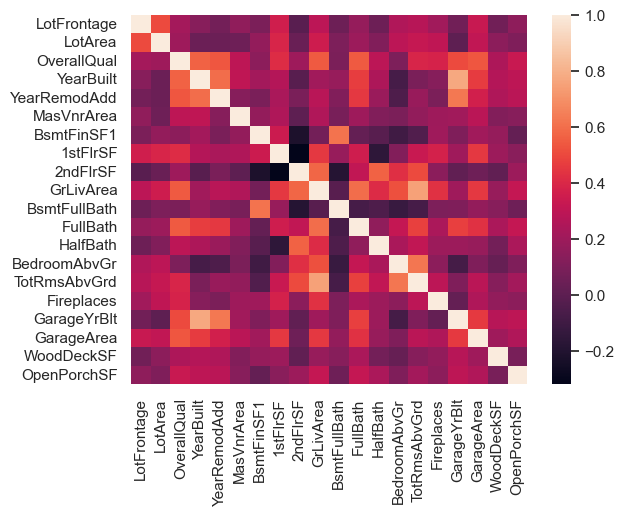

In [88]:
# Construção do gráfico de autocorrelação
sns.heatmap(features_numericas.corr())

In [89]:
# Verificação das variáveis que possuem uma autocorrelação superior a 0.6

df_autocorrelacao = features_numericas.corr()    # Armazena o data frame de valores de autocorralação
resultado = np.where(df_autocorrelacao >= 0.6)                # Verificar as linhas e colunas dos valores em que é igual ou superior a 0.6
linhas, colunas = resultado[0], resultado[1]                  # Como o resultado são dois duas matrizes, uma referente à linha e a outra referente à coluna, salva cada uma em novas variáveis.

# Inicia um laço para a impressão dos conjutos em que o coeficiente é superior a 0.6 
for linha, coluna in zip(linhas, colunas):                    # Prepara o laço para a quantidade de combinações possíveis  
    if df_autocorrelacao.index[linha] == df_autocorrelacao.index[coluna]: # Verifica se os nomes são iguais para não imprimir, pois nesse o coeficiente será 1
        pass
    else:
        if coluna > linha:
            # Imprime as features que possuem um coeficiente de autocorrelação superior á 0.6
            print(f' {df_autocorrelacao.index[linha]} <--> {df_autocorrelacao.index[coluna]}  ----> {df_autocorrelacao.iloc[linha,coluna]}')

 YearBuilt <--> GarageYrBlt  ----> 0.7719493056331049
 YearRemodAdd <--> GarageYrBlt  ----> 0.6285435651320868
 BsmtFinSF1 <--> BsmtFullBath  ----> 0.6084733883384751
 GrLivArea <--> TotRmsAbvGrd  ----> 0.7484074725012069
 BedroomAbvGr <--> TotRmsAbvGrd  ----> 0.6236044565649782


In [90]:
# REMOÇÃO DE FEATURES AUTOCORRELATAS
features_numericas.drop(columns=['GarageYrBlt', 'TotRmsAbvGrd'], inplace = True)

### features_ln_numericas

<Axes: >

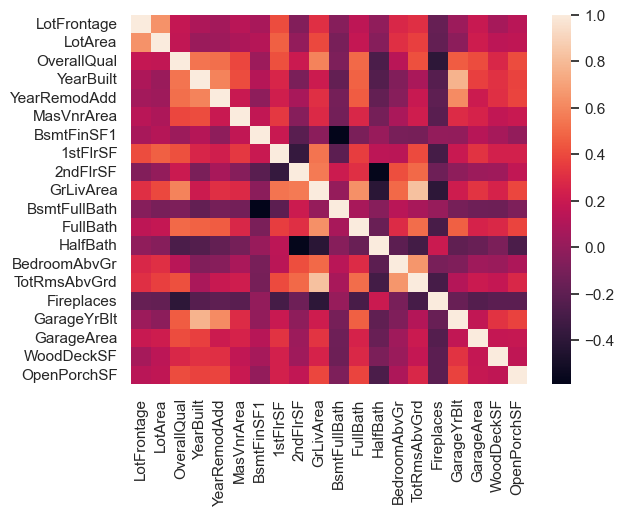

In [91]:
# Construção do gráfico de autocorrelação
sns.heatmap(features_ln_numericas.corr())

In [92]:
# Verificação das variáveis que possuem uma autocorrelação superior a 0.6

df_autocorrelacao = features_ln_numericas.corr()       # Armazena o data frame de valores de autocorralação
resultado = np.where(df_autocorrelacao >= 0.6)                # Verificar as linhas e colunas dos valores em que é igual ou superior a 0.6
linhas, colunas = resultado[0], resultado[1]                  # Como o resultado são dois duas matrizes, uma referente à linha e a outra referente à coluna, salva cada uma em novas variáveis.

# Inicia um laço para a impressão dos conjutos em que o coeficiente é superior a 0.6 
for linha, coluna in zip(linhas, colunas):                    # Prepara o laço para a quantidade de combinações possíveis  
    if df_autocorrelacao.index[linha] == df_autocorrelacao.index[coluna]: # Verifica se os nomes são iguais para não imprimir, pois nesse o coeficiente será 1
        pass
    else:
        if coluna > linha:
            # Imprime as features que possuem um coeficiente de autocorrelação superior á 0.6
            print(f' {df_autocorrelacao.index[linha]} <--> {df_autocorrelacao.index[coluna]}  ----> {df_autocorrelacao.iloc[linha,coluna]}')

 LotFrontage <--> LotArea  ----> 0.6432093861733416
 YearBuilt <--> GarageYrBlt  ----> 0.7663039071733068
 YearRemodAdd <--> GarageYrBlt  ----> 0.6177810522494684
 GrLivArea <--> FullBath  ----> 0.6360846030093457
 GrLivArea <--> TotRmsAbvGrd  ----> 0.8244265076005961
 BedroomAbvGr <--> TotRmsAbvGrd  ----> 0.6530837654631342


In [93]:
# REMOÇÃO DE FEATURES AUTOCORRELATAS
features_ln_numericas.drop(columns=['LotFrontage', 'GarageYrBlt', 'TotRmsAbvGrd'], inplace = True)

### features_numericas_sem_outlier

<Axes: >

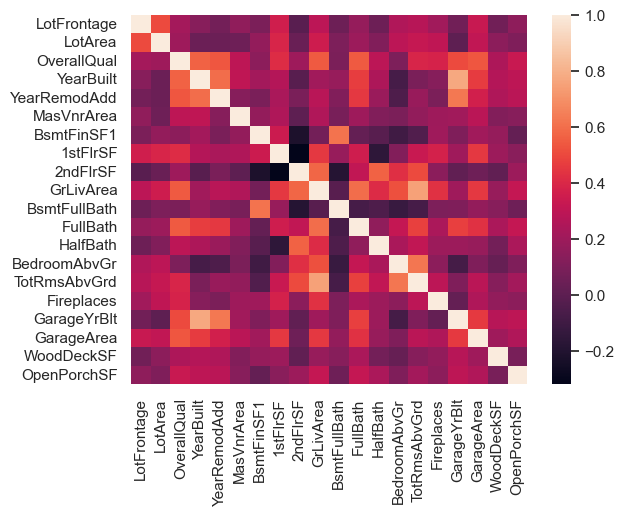

In [94]:
# Construção do gráfico de autocorrelação
sns.heatmap(features_numericas_sem_outlier.corr())

In [95]:
# Verificação das variáveis que possuem uma autocorrelação superior a 0.6

df_autocorrelacao = features_numericas_sem_outlier.corr()       # Armazena o data frame de valores de autocorralação
resultado = np.where(df_autocorrelacao >= 0.6)                # Verificar as linhas e colunas dos valores em que é igual ou superior a 0.6
linhas, colunas = resultado[0], resultado[1]                  # Como o resultado são dois duas matrizes, uma referente à linha e a outra referente à coluna, salva cada uma em novas variáveis.

# Inicia um laço para a impressão dos conjutos em que o coeficiente é superior a 0.6 
for linha, coluna in zip(linhas, colunas):                    # Prepara o laço para a quantidade de combinações possíveis  
    if df_autocorrelacao.index[linha] == df_autocorrelacao.index[coluna]: # Verifica se os nomes são iguais para não imprimir, pois nesse o coeficiente será 1
        pass
    else:
        if coluna > linha:
            # Imprime as features que possuem um coeficiente de autocorrelação superior á 0.6
            print(f' {df_autocorrelacao.index[linha]} <--> {df_autocorrelacao.index[coluna]}  ----> {df_autocorrelacao.iloc[linha,coluna]}')

 YearBuilt <--> GarageYrBlt  ----> 0.7719493056331049
 YearRemodAdd <--> GarageYrBlt  ----> 0.6285435651320868
 BsmtFinSF1 <--> BsmtFullBath  ----> 0.6084733883384751
 GrLivArea <--> TotRmsAbvGrd  ----> 0.7484074725012069
 BedroomAbvGr <--> TotRmsAbvGrd  ----> 0.6236044565649782


In [96]:
# REMOÇÃO DE FEATURES AUTOCORRELATAS
features_numericas_sem_outlier.drop(columns=['GarageYrBlt', 'TotRmsAbvGrd'], inplace = True)

### features_ln_numericas_sem_outlier

<Axes: >

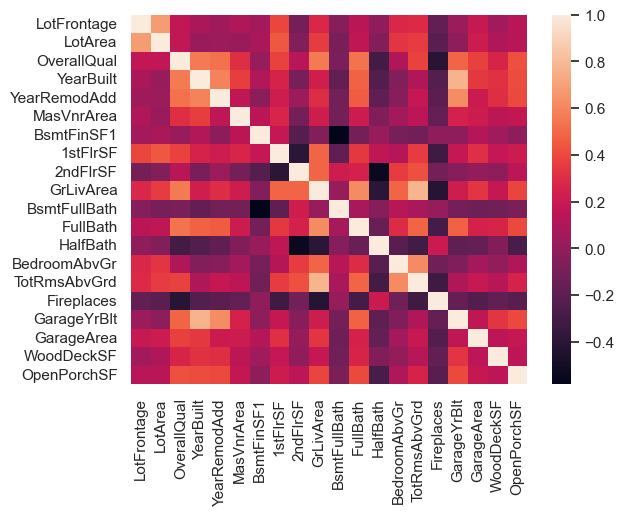

In [97]:
# Construção do gráfico de autocorrelação
sns.heatmap(features_ln_numericas_sem_outlier.corr())

In [98]:
# Verificação das variáveis que possuem uma autocorrelação superior a 0.6

df_autocorrelacao = features_ln_numericas_sem_outlier.corr()       # Armazena o data frame de valores de autocorralação
resultado = np.where(df_autocorrelacao >= 0.6)                # Verificar as linhas e colunas dos valores em que é igual ou superior a 0.6
linhas, colunas = resultado[0], resultado[1]                  # Como o resultado são dois duas matrizes, uma referente à linha e a outra referente à coluna, salva cada uma em novas variáveis.

# Inicia um laço para a impressão dos conjutos em que o coeficiente é superior a 0.6 
for linha, coluna in zip(linhas, colunas):                    # Prepara o laço para a quantidade de combinações possíveis  
    if df_autocorrelacao.index[linha] == df_autocorrelacao.index[coluna]: # Verifica se os nomes são iguais para não imprimir, pois nesse o coeficiente será 1
        pass
    else:
        if coluna > linha:
            # Imprime as features que possuem um coeficiente de autocorrelação superior á 0.6
            print(f' {df_autocorrelacao.index[linha]} <--> {df_autocorrelacao.index[coluna]}  ----> {df_autocorrelacao.iloc[linha,coluna]}')

 LotFrontage <--> LotArea  ----> 0.684477410800538
 YearBuilt <--> GarageYrBlt  ----> 0.7687321942746068
 YearRemodAdd <--> GarageYrBlt  ----> 0.626435443404866
 GrLivArea <--> FullBath  ----> 0.6211653200060199
 GrLivArea <--> TotRmsAbvGrd  ----> 0.7715395728594565
 BedroomAbvGr <--> TotRmsAbvGrd  ----> 0.6173557578408471


In [99]:
# REMOÇÃO DE FEATURES AUTOCORRELATAS
features_ln_numericas_sem_outlier.drop(columns=['LotFrontage', 'GarageYrBlt', 'TotRmsAbvGrd'], inplace = True)

# Normalização das Features e Target

### features_numericas

In [100]:
# Normalização de máximo e mínino. Xnormalizado = (X - Xmin) / (Xmax -Xmin)
features_numericas_parametro_normalizacao = MinMaxScaler(feature_range = (0,1))

# Criando um df normalizado com os dados das features e target juntos
features_numericas_normalizadas = pd.DataFrame(features_numericas_parametro_normalizacao.fit_transform(features_numericas), columns=features_numericas.columns)

### features_ln_numericas

In [101]:
# Normalização de máximo e mínino. Xnormalizado = (X - Xmin) / (Xmax -Xmin)
features_ln_numericas_parametro_normalizacao = MinMaxScaler(feature_range = (0,1))

# Criando um df normalizado com os dados das features e target juntos
features_ln_numericas_normalizadas = pd.DataFrame(features_ln_numericas_parametro_normalizacao.fit_transform(features_ln_numericas), columns=features_ln_numericas.columns)

### features_numericas_sem_outlier

In [102]:
# Normalização de máximo e mínino. Xnormalizado = (X - Xmin) / (Xmax -Xmin)
features_numericas_sem_outlier_parametro_normalizacao = MinMaxScaler(feature_range = (0,1))

# Criando um df normalizado com os dados das features e target juntos
features_numericas_sem_outlier_normalizadas = pd.DataFrame(features_numericas_sem_outlier_parametro_normalizacao.fit_transform(features_numericas_sem_outlier), columns=features_numericas_sem_outlier.columns)

### features_ln_numericas_sem_outlier

In [103]:
# Normalização de máximo e mínino. Xnormalizado = (X - Xmin) / (Xmax -Xmin)
features_ln_numericas_sem_outlier_parametro_normalizacao = MinMaxScaler(feature_range = (0,1))

# Criando um df normalizado com os dados das features e target juntos
features_ln_numericas_sem_outlier_normalizadas = pd.DataFrame(features_ln_numericas_sem_outlier_parametro_normalizacao.fit_transform(features_ln_numericas_sem_outlier), columns=features_ln_numericas_sem_outlier.columns)

### Target

In [104]:
# NORMALIZAÇÃO DA VARIÁVEL DEPENDENTE (TARGET)
target_parametro_normalizacao = MinMaxScaler(feature_range = (0,1))

# CRIAÇÃO DE UM DF NORMALIZADO DA VARIÁVEL TARGET
y_treinamento_normalizada = pd.DataFrame(target_parametro_normalizacao.fit_transform(y_treinamento.values.reshape(-1, 1)), columns= [nome_target])



# NORMALIZAÇÃO DA VARIÁVEL DEPENDENTE (TARGET)
target_ln_parametro_normalizacao = MinMaxScaler(feature_range = (0,1))

# CRIAÇÃO DE UM DF NORMALIZADO DA VARIÁVEL TARGET
y_treinamento_ln_normalizada = pd.DataFrame(target_ln_parametro_normalizacao.fit_transform(df_ln[nome_target].values.reshape(-1, 1)), columns= [nome_target])

# TREINAMENTO DOS MODELOS

Serão montados três modelos de regressão linear e ao final escolheremos aquele de melhor resultado. 

Para isso iremos calcular o **Coeficiênte de Determinação Múltipla**.

## Treinamento do modelo com features_numericas

Será criado um modelo de Regressão Linear para as variáveis numéricas previamente separadas no data frame **"features_numericas"**.

In [105]:
# TREINAMENTO PARA FEATURES TOTAIS, NUMÉRICAS + CATEGÓRICAS
features_numericas_modelo = LinearRegression()
features_numericas_modelo.fit(features_numericas_normalizadas,y_treinamento_normalizada)

LinearRegression()

## Treinamento do modelo com features_ln_numericas

Será criado um modelo de Regressão Linear para as variáveis numéricas que foram aplicadas a transformação ln. **"features_ln_numericas"**.

In [106]:
# TREINAMENTO PARA FEATURES TRANSFORMADAS.
features_ln_numericas_modelo = LinearRegression()
features_ln_numericas_modelo.fit(features_ln_numericas_normalizadas,y_treinamento_ln_normalizada)

LinearRegression()

## Treinamento do modelo com features_numericas_sem_outlier

In [107]:
# TREINAMENTO PARA FEATURES CATEGÓRICAS.
features_numericas_sem_outlier_modelo = LinearRegression()
features_numericas_sem_outlier_modelo.fit(features_numericas_sem_outlier_normalizadas,y_treinamento_normalizada)

LinearRegression()

## Treinamento do modelo com features_ln_numericas_sem_outlier

In [108]:
# TREINAMENTO PARA FEATURES CATEGÓRICAS.
features_ln_numericas_sem_outlier_modelo = LinearRegression()
features_ln_numericas_sem_outlier_modelo.fit(features_ln_numericas_sem_outlier_normalizadas,y_treinamento_ln_normalizada)

LinearRegression()

# TRATAMENTO DOS DADOS DE VALIDAÇÃO

Para que sejam utilizados os dados que foram separados como validação é necessário normaliza-los com as mesmas regras de normalizção que foram utilizadas nos dados de treinamento.

## Tratamento das variáveis de validação para o modelo de features_numericas

In [109]:
# Criação de um Data frame apenas para eliminação de linhas com valores não válidos.
dados_validacao = pd.concat([X_validacao,y_validacao], axis = 1)

# Separação das features que serão utilizadas no modelo.
X_validacao_features_numericas = dados_validacao[features_numericas_normalizadas.columns].copy()
X_validacao_features_numericas[nome_target] = dados_validacao[nome_target]

# Eliminação de linhas que contenham valores não  valores não válidos
X_validacao_features_numericas = X_validacao_features_numericas.dropna()

# Separação das variáveis independentes e dependentes
Y_validacao_features_numericas = X_validacao_features_numericas[nome_target]
X_validacao_features_numericas = X_validacao_features_numericas.drop(columns=[nome_target])

# Criando um df com os dados normalizado para as variáveis numéricas
X_validacao_features_numericas_normalizado = pd.DataFrame(features_numericas_parametro_normalizacao.transform(X_validacao_features_numericas), columns=X_validacao_features_numericas.columns)

# Criando um df com os dados normalizado para as variáveis numéricas
Y_validacao_features_numericas_normalizado = pd.DataFrame(target_parametro_normalizacao.transform(Y_validacao_features_numericas.values.reshape(-1, 1)), columns=[nome_target])

## Tratamento das variáveis de validação para o modelo de features_ln_numericas

In [110]:
# Criação de um Data frame apenas para eliminação de linhas com valores não válidos.
dados_validacao = pd.concat([X_validacao,y_validacao], axis = 1)

# Separação das features que serão utilizadas no modelo.
X_validacao_features_ln_numericas = dados_validacao[features_ln_numericas_normalizadas.columns].copy()
X_validacao_features_ln_numericas[nome_target] = dados_validacao[nome_target]

# Eliminação de linhas que contenham valores não  valores não válidos
X_validacao_features_ln_numericas = X_validacao_features_ln_numericas.dropna()

# Verificação se há valor iguais a 0 no data frame, caso exista, substitua por 1 para a aplicação do log.
X_validacao_features_ln_numericas[X_validacao_features_ln_numericas == 0] = 1

# Aplicacação do logarítmo neperiano à todas as features
X_validacao_features_ln_numericas = X_validacao_features_ln_numericas.apply(np.log)
# X_validacao_features_ln_numericas = np.where(X_validacao_features_ln_numericas == 0, 1, X_validacao_features_ln_numericas.apply(np.log))

# Separação das variáveis independentes e dependentes
Y_validacao_features_ln_numericas = X_validacao_features_ln_numericas[nome_target]
X_validacao_features_ln_numericas = X_validacao_features_ln_numericas.drop(columns=[nome_target])

# Criando um df com os dados normalizado para as variáveis numéricas
X_validacao_features_ln_numericas_normalizado = pd.DataFrame(features_ln_numericas_parametro_normalizacao.transform(X_validacao_features_ln_numericas), columns=X_validacao_features_ln_numericas.columns)

# Criando um df com os dados normalizado para as variáveis numéricas
Y_validacao_features_ln_numericas_normalizado = pd.DataFrame(target_ln_parametro_normalizacao.transform(Y_validacao_features_ln_numericas.values.reshape(-1, 1)), columns=[nome_target])

## Tratamento das Features de validação para o modelo de features_numericas_sem_outlier

In [111]:
# Criação de um Data frame apenas para eliminação de linhas com valores não válidos.
dados_validacao = pd.concat([X_validacao,y_validacao], axis = 1)

# Separação das features que serão utilizadas no modelo.
X_validacao_features_numericas_sem_outlier = dados_validacao[features_numericas_sem_outlier_normalizadas.columns].copy()
X_validacao_features_numericas_sem_outlier[nome_target] = dados_validacao[nome_target]

# Eliminação de linhas que contenham valores não  valores não válidos
X_validacao_features_numericas_sem_outlier = X_validacao_features_numericas_sem_outlier.dropna()

# Separação das variáveis independentes e dependentes
Y_validacao_features_numericas_sem_outlier = X_validacao_features_numericas_sem_outlier[nome_target]
X_validacao_features_numericas_sem_outlier = X_validacao_features_numericas_sem_outlier.drop(columns=[nome_target])

# Criando um df com os dados normalizado para as variáveis numéricas
X_validacao_features_numericas_sem_outlier_normalizado = pd.DataFrame(features_numericas_sem_outlier_parametro_normalizacao.transform(X_validacao_features_numericas_sem_outlier), columns=X_validacao_features_numericas_sem_outlier.columns)

# Criando um df com os dados normalizado para as variáveis numéricas
Y_validacao_features_numericas_sem_outlier_normalizado = pd.DataFrame(target_parametro_normalizacao.transform(Y_validacao_features_numericas_sem_outlier.values.reshape(-1, 1)), columns=[nome_target])

## Tratamento das Features de validação para o modelo de features_ln_numericas_sem_outlier

In [112]:
# Criação de um Data frame apenas para eliminação de linhas com valores não válidos.
dados_validacao = pd.concat([X_validacao,y_validacao], axis = 1)

# Separação das features que serão utilizadas no modelo.
X_validacao_features_ln_numericas_sem_outlier = dados_validacao[features_ln_numericas_sem_outlier_normalizadas.columns].copy()
X_validacao_features_ln_numericas_sem_outlier[nome_target] = dados_validacao[nome_target]

# Eliminação de linhas que contenham valores não  valores não válidos
X_validacao_features_ln_numericas_sem_outlier = X_validacao_features_ln_numericas_sem_outlier.dropna()

# Verificação de valores iguais a 0 no data frame e substituição por 1, caso exista.
X_validacao_features_ln_numericas_sem_outlier[X_validacao_features_ln_numericas_sem_outlier == 0] = 1

# Aplicacação do logarítmo neperiano à todas as features
X_validacao_features_ln_numericas_sem_outlier = X_validacao_features_ln_numericas_sem_outlier.apply(np.log)

# Separação das variáveis independentes e dependentes
Y_validacao_features_ln_numericas_sem_outlier = X_validacao_features_ln_numericas_sem_outlier[nome_target]
X_validacao_features_ln_numericas_sem_outlier = X_validacao_features_ln_numericas_sem_outlier.drop(columns=[nome_target])

# Criando um df com os dados normalizado para as variáveis numéricas
X_validacao_features_ln_numericas_sem_outlier_normalizado = pd.DataFrame(features_ln_numericas_sem_outlier_parametro_normalizacao.transform(X_validacao_features_ln_numericas_sem_outlier), columns=X_validacao_features_ln_numericas_sem_outlier.columns)

# Criando um df com os dados normalizado para as variáveis numéricas
Y_validacao_features_ln_numericas_sem_outlier_normalizado = pd.DataFrame(target_ln_parametro_normalizacao.transform(Y_validacao_features_ln_numericas_sem_outlier.values.reshape(-1, 1)), columns=[nome_target])

# VALIDAÇÃO DOS MODELOS 

# Validação do moledo com features_numericas

In [113]:
# Coeficiente de determinação para as variáveis de treinamento
score_df.at['Regressão Linear Teste','Numéricas'] = features_numericas_modelo.score(features_numericas_normalizadas,y_treinamento_normalizada)
print(score_df.at['Regressão Linear Teste','Numéricas'])

0.7915601668015652


In [114]:
# Coediciente de determinação para as variáveis de validação
score_df.at['Regressão Linear Validação','Numéricas'] = features_numericas_modelo.score(X_validacao_features_numericas_normalizado,Y_validacao_features_numericas_normalizado)
print(score_df.at['Regressão Linear Validação','Numéricas'])

0.8070797453662256


# Validação do moledo com features_ln_numericas

In [115]:
# Coediciente de determinação para as variáveis de treinamento
score_df.at['Regressão Linear Teste','Tranformada ln'] = features_ln_numericas_modelo.score(features_ln_numericas_normalizadas,y_treinamento_ln_normalizada)
print(score_df.at['Regressão Linear Teste','Tranformada ln'])

0.8539731876396106


In [116]:
# Coediciente de determinação para as variáveis de validação
score_df.at['Regressão Linear Validação','Tranformada ln'] = features_ln_numericas_modelo.score(X_validacao_features_ln_numericas_normalizado,Y_validacao_features_ln_numericas_normalizado)
print(score_df.at['Regressão Linear Validação','Tranformada ln'])

0.8392898510032294


# Validação do moledo com features_numericas_sem_outlier

In [117]:
# Coediciente de determinação para as variáveis de validação
score_df.at['Regressão Linear Teste','Numéricas sem Outlier'] = features_numericas_sem_outlier_modelo.score(features_numericas_sem_outlier_normalizadas,y_treinamento_normalizada)
print(score_df.at['Regressão Linear Teste','Numéricas sem Outlier'])

0.7915601668015652


In [118]:
# Coediciente de determinação para as variáveis de validação
score_df.at['Regressão Linear Validação','Numéricas sem Outlier'] = features_numericas_sem_outlier_modelo.score(X_validacao_features_numericas_sem_outlier_normalizado,Y_validacao_features_numericas_sem_outlier_normalizado)
print(score_df.at['Regressão Linear Validação','Numéricas sem Outlier'])

0.8070797453662256


# Validação do moledo com features_ln_numericas_sem_outlier

In [119]:
# Coediciente de determinação para as variáveis de treinamento
score_df.at['Regressão Linear Teste','Transformada ln sem Outlier'] = features_ln_numericas_sem_outlier_modelo.score(features_ln_numericas_sem_outlier_normalizadas,y_treinamento_ln_normalizada)
print(score_df.at['Regressão Linear Teste','Transformada ln sem Outlier'])

0.8474341957631393


In [120]:
# Coediciente de determinação para as variáveis de validação
score_df.at['Regressão Linear Validação','Transformada ln sem Outlier'] = features_ln_numericas_sem_outlier_modelo.score(X_validacao_features_ln_numericas_sem_outlier_normalizado,Y_validacao_features_ln_numericas_sem_outlier_normalizado)
print(score_df.at['Regressão Linear Validação','Transformada ln sem Outlier'])

0.8399409464948803


# TREINAMENTO PARA O MODELO REGULARIZADO L1 (LASSO)

## Treinamento do modelo com features_numericas

Será criado um modelo de Regressão Linear regularizado L1 (Lasso) para as variáveis numéricas.

Ante de iniciar o treinamento devemos verificar o melhor valor para o parâmetro alpha que controla a força da regularização.

In [121]:
# Importa o método que faz pesquisa exaustiva sobre valores de parâmetros especificados para um estimador.
from sklearn.model_selection import GridSearchCV  

# Carrega um método de regularização.
lasso = Lasso()
# Constroi um dicionário para utilização como possíveis valores do parâmetro.
parametro = {'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Carrega o método de verificação do melhor parâmetro
lasso_cv = GridSearchCV(lasso, parametro, cv=5)
# Utiliza as variáveis reais para avaliar os melhores valores de alpha.
lasso_cv.fit(features_numericas_normalizadas, y_treinamento_normalizada)

# Salva o melhor valor de alpha dentre os disponíveis no dicionário.
best_alpha = lasso_cv.best_params_['alpha']
print(f'Melhor valor de alpha: {best_alpha}')

Melhor valor de alpha: 0.0001


In [122]:
# TREINAMENTO PARA FEATURES NUMÉRICAS
features_numericas_modelo_l1 = Lasso(alpha=0.0001)
features_numericas_modelo_l1.fit(features_numericas_normalizadas,y_treinamento_normalizada)

Lasso(alpha=0.0001)

## Treinamento do modelo com features_ln_numericas

Será criado um modelo de Regressão Linear para as variáveis numéricas que foram aplicadas a transformação ln. **"features_ln_numericas"**.

In [123]:
# Carrega um método de regularização.
lasso = Lasso()
# Constroi um dicionário para utilização como possíveis valores do parâmetro.
parametro = {'alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Carrega o método de verificação do melhor parâmetro
lasso_cv = GridSearchCV(lasso, parametro, cv=5)
# Utiliza as variáveis reais para avaliar os melhores valores de alpha.
lasso_cv.fit(features_ln_numericas_normalizadas, y_treinamento_ln_normalizada)

# Salva o melhor valor de alpha dentre os disponíveis no dicionário.
best_alpha = lasso_cv.best_params_['alpha']
print(f'Melhor valor de alpha: {best_alpha}')

Melhor valor de alpha: 1e-05


In [124]:
# TREINAMENTO PARA FEATURES TRANSFORMADAS.
features_ln_numericas_modelo_l1 = Lasso(alpha=0.00001)
features_ln_numericas_modelo_l1.fit(features_ln_numericas_normalizadas,y_treinamento_ln_normalizada)

Lasso(alpha=1e-05)

## Treinamento do modelo com features_numericas_sem_outlier

In [125]:
# Carrega um método de regularização.
lasso = Lasso()
# Constroi um dicionário para utilização como possíveis valores do parâmetro.
parametro = {'alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Carrega o método de verificação do melhor parâmetro
lasso_cv = GridSearchCV(lasso, parametro, cv=5)
# Utiliza as variáveis reais para avaliar os melhores valores de alpha.
lasso_cv.fit(features_numericas_sem_outlier_normalizadas, y_treinamento_normalizada)

# Salva o melhor valor de alpha dentre os disponíveis no dicionário.
best_alpha = lasso_cv.best_params_['alpha']
print(f'Melhor valor de alpha: {best_alpha}')

Melhor valor de alpha: 0.0001


In [126]:
# TREINAMENTO PARA FEATURES CATEGÓRICAS.
features_numericas_sem_outlier_modelo_l1 = Lasso(alpha=0.0001)
features_numericas_sem_outlier_modelo_l1.fit(features_numericas_sem_outlier_normalizadas,y_treinamento_normalizada)

Lasso(alpha=0.0001)

## Treinamento do modelo com features_ln_numericas_sem_outlier

In [127]:
# Carrega um método de regularização.
lasso = Lasso()
# Constroi um dicionário para utilização como possíveis valores do parâmetro.
parametro = {'alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Carrega o método de verificação do melhor parâmetro
lasso_cv = GridSearchCV(lasso, parametro, cv=5)
# Utiliza as variáveis reais para avaliar os melhores valores de alpha.
lasso_cv.fit(features_ln_numericas_sem_outlier_normalizadas, y_treinamento_ln_normalizada)

# Salva o melhor valor de alpha dentre os disponíveis no dicionário.
best_alpha = lasso_cv.best_params_['alpha']
print(f'Melhor valor de alpha: {best_alpha}')

Melhor valor de alpha: 0.0001


In [128]:
# TREINAMENTO PARA FEATURES CATEGÓRICAS.
features_ln_numericas_sem_outlier_modelo_l1 = Lasso(alpha=0.0001)
features_ln_numericas_sem_outlier_modelo_l1.fit(features_ln_numericas_sem_outlier_normalizadas,y_treinamento_ln_normalizada)

Lasso(alpha=0.0001)

# VALIDAÇÃO DO MODELO REGULARIZADO L1 (Lasso)

# Validação do moledo com features_numericas

In [129]:
# Coeficiente de determinação para as variáveis de treinamento
score_df.at['Regressão Linear L1 Teste','Numéricas'] = features_numericas_modelo_l1.score(features_numericas_normalizadas,y_treinamento_normalizada)
# print(score_df.at['Regressão Linear L1 Teste','Numéricas'])

In [130]:
# Coediciente de determinação para as variáveis de validação
score_df.at['Regressão Linear L1 Validação','Numéricas'] = features_numericas_modelo_l1.score(X_validacao_features_numericas_normalizado,Y_validacao_features_numericas_normalizado)
# print(score_df.at['Regressão Linear L1 Validação','Numéricas'])

### Verificação das features igualadas a zero.

In [131]:
# Coeficientes das features
coeficientes = features_numericas_modelo_l1.coef_

# Identificando as features com coeficientes iguais a zero
features_zero_coef = features_numericas_normalizadas.columns[coeficientes == 0]
print("Features com coeficientes zero:", features_zero_coef)

Features com coeficientes zero: Index([], dtype='object')


# Validação do moledo com features_ln_numericas

In [132]:
# Coediciente de determinação para as variáveis de treinamento
score_df.at['Regressão Linear L1 Teste','Tranformada ln'] = features_ln_numericas_modelo_l1.score(features_ln_numericas_normalizadas,y_treinamento_ln_normalizada)
# print(score_df.at['Regressão Linear L1 Teste','Tranformada ln'])

In [133]:
# Coediciente de determinação para as variáveis de validação
score_df.at['Regressão Linear L1 Validação','Tranformada ln'] = features_ln_numericas_modelo_l1.score(X_validacao_features_ln_numericas_normalizado,Y_validacao_features_ln_numericas_normalizado)
# print(score_df.at['Regressão Linear L1 Validação','Tranformada ln'])

# Validação do moledo com features_numericas_sem_outlier

In [134]:
# Coediciente de determinação para as variáveis de validação
score_df.at['Regressão Linear L1 Teste','Numéricas sem Outlier'] = features_numericas_sem_outlier_modelo_l1.score(features_numericas_sem_outlier_normalizadas,y_treinamento_normalizada)
# print(score_df.at['Regressão Linear L1 Teste','Numéricas sem Outlier'])

In [135]:
# Coediciente de determinação para as variáveis de validação
score_df.at['Regressão Linear L1 Validação','Numéricas sem Outlier'] = features_numericas_sem_outlier_modelo_l1.score(X_validacao_features_numericas_sem_outlier_normalizado,Y_validacao_features_numericas_sem_outlier_normalizado)
# print(score_df.at['Regressão Linear L1 Validação','Numéricas sem Outlier'])

# Validação do moledo com features_ln_numericas_sem_outlier

In [136]:
# Coediciente de determinação para as variáveis de treinamento
score_df.at['Regressão Linear L1 Teste','Transformada ln sem Outlier'] = features_ln_numericas_sem_outlier_modelo_l1.score(features_ln_numericas_sem_outlier_normalizadas,y_treinamento_ln_normalizada)
# print(score_df.at['Regressão Linear L1 Teste','Transformada ln sem Outlier'])

In [137]:
# Coediciente de determinação para as variáveis de validação
score_df.at['Regressão Linear L1 Validação','Transformada ln sem Outlier'] = features_ln_numericas_sem_outlier_modelo_l1.score(X_validacao_features_ln_numericas_sem_outlier_normalizado,Y_validacao_features_ln_numericas_sem_outlier_normalizado)
# print(score_df.at['Regressão Linear L1 Validação','Transformada ln sem Outlier'])

# TREINAMENTO PARA O MODELO REGULARIZADO L2 (RIDGE)

## Treinamento do modelo com features_numericas

Será criado um modelo de Regressão Linear regularizado L1 (Lasso) para as variáveis numéricas.

Ante de iniciar o treinamento devemos verificar o melhor valor para o parâmetro alpha que controla a força da regularização.

In [138]:
# Importa o método que faz pesquisa exaustiva sobre valores de parâmetros especificados para um estimador.
from sklearn.model_selection import GridSearchCV  

# Carrega um método de regularização.
ridge = Ridge()
# Constroi um dicionário para utilização como possíveis valores do parâmetro.
parametro = {'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Carrega o método de verificação do melhor parâmetro
ridge_cv = GridSearchCV(ridge, parametro, cv=5)
# Utiliza as variáveis reais para avaliar os melhores valores de alpha.
ridge_cv.fit(features_numericas_normalizadas, y_treinamento_normalizada)

# Salva o melhor valor de alpha dentre os disponíveis no dicionário.
best_alpha = ridge_cv.best_params_['alpha']
print(f'Melhor valor de alpha: {best_alpha}')

Melhor valor de alpha: 1


In [139]:
# TREINAMENTO PARA FEATURES NUMÉRICAS
features_numericas_modelo_l2 = Ridge(alpha=1)
features_numericas_modelo_l2.fit(features_numericas_normalizadas,y_treinamento_normalizada)

Ridge(alpha=1)

## Treinamento do modelo com features_ln_numericas

Será criado um modelo de Regressão Linear para as variáveis numéricas que foram aplicadas a transformação ln. **"features_ln_numericas"**.

In [140]:
# Carrega um método de regularização.
ridge = Ridge()
# Constroi um dicionário para utilização como possíveis valores do parâmetro.
parametro = {'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Carrega o método de verificação do melhor parâmetro
ridge_cv = GridSearchCV(ridge, parametro, cv=5)
# Utiliza as variáveis reais para avaliar os melhores valores de alpha.
ridge_cv.fit(features_ln_numericas_normalizadas, y_treinamento_ln_normalizada)

# Salva o melhor valor de alpha dentre os disponíveis no dicionário.
best_alpha = ridge_cv.best_params_['alpha']
print(f'Melhor valor de alpha: {best_alpha}')

Melhor valor de alpha: 0.1


In [141]:
# TREINAMENTO PARA FEATURES TRANSFORMADAS.
features_ln_numericas_modelo_l2 = Ridge(alpha=0.1)
features_ln_numericas_modelo_l2.fit(features_ln_numericas_normalizadas,y_treinamento_ln_normalizada)

Ridge(alpha=0.1)

## Treinamento do modelo com features_numericas_sem_outlier

In [142]:
# Carrega um método de regularização.
ridge = Ridge()
# Constroi um dicionário para utilização como possíveis valores do parâmetro.
parametro = {'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Carrega o método de verificação do melhor parâmetro
ridge_cv = GridSearchCV(ridge, parametro, cv=5)
# Utiliza as variáveis reais para avaliar os melhores valores de alpha.
ridge_cv.fit(features_numericas_sem_outlier_normalizadas, y_treinamento_normalizada)

# Salva o melhor valor de alpha dentre os disponíveis no dicionário.
best_alpha = ridge_cv.best_params_['alpha']
print(f'Melhor valor de alpha: {best_alpha}')

Melhor valor de alpha: 1


In [143]:
# TREINAMENTO PARA FEATURES CATEGÓRICAS.
features_numericas_sem_outlier_modelo_l2 = Ridge(alpha=1)
features_numericas_sem_outlier_modelo_l2.fit(features_numericas_sem_outlier_normalizadas,y_treinamento_normalizada)

Ridge(alpha=1)

## Treinamento do modelo com features_ln_numericas_sem_outlier

In [144]:
# Carrega um método de regularização.
ridge = Ridge()
# Constroi um dicionário para utilização como possíveis valores do parâmetro.
parametro = {'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Carrega o método de verificação do melhor parâmetro
ridge_cv = GridSearchCV(ridge, parametro, cv=5)
# Utiliza as variáveis reais para avaliar os melhores valores de alpha.
ridge_cv.fit(features_ln_numericas_sem_outlier_normalizadas, y_treinamento_ln_normalizada)

# Salva o melhor valor de alpha dentre os disponíveis no dicionário.
best_alpha = ridge_cv.best_params_['alpha']
print(f'Melhor valor de alpha: {best_alpha}')

Melhor valor de alpha: 0.1


In [145]:
# TREINAMENTO PARA FEATURES CATEGÓRICAS.
features_ln_numericas_sem_outlier_modelo_l2 = Ridge(alpha=0.1)
features_ln_numericas_sem_outlier_modelo_l2.fit(features_ln_numericas_sem_outlier_normalizadas,y_treinamento_ln_normalizada)

Ridge(alpha=0.1)

# VALIDAÇÃO DO MODELO REGULARIZADO L2 (RIDGE)

# Validação do moledo com features_numericas

In [146]:
# Coeficiente de determinação para as variáveis de treinamento
score_df.at['Regressão Linear L2 Teste','Numéricas'] = features_numericas_modelo_l2.score(features_numericas_normalizadas,y_treinamento_normalizada)

In [147]:
# Coediciente de determinação para as variáveis de validação
score_df.at['Regressão Linear L2 Validação','Numéricas'] = features_numericas_modelo_l2.score(X_validacao_features_numericas_normalizado,Y_validacao_features_numericas_normalizado)

# Validação do moledo com features_ln_numericas

In [148]:
# Coediciente de determinação para as variáveis de treinamento
score_df.at['Regressão Linear L2 Teste','Tranformada ln'] = features_ln_numericas_modelo_l2.score(features_ln_numericas_normalizadas,y_treinamento_ln_normalizada)

In [149]:
# Coediciente de determinação para as variáveis de validação
score_df.at['Regressão Linear L2 Validação','Tranformada ln'] = features_ln_numericas_modelo_l2.score(X_validacao_features_ln_numericas_normalizado,Y_validacao_features_ln_numericas_normalizado)

# Validação do moledo com features_numericas_sem_outlier

In [150]:
# Coediciente de determinação para as variáveis de validação
score_df.at['Regressão Linear L2 Teste','Numéricas sem Outlier'] = features_numericas_sem_outlier_modelo_l2.score(features_numericas_sem_outlier_normalizadas,y_treinamento_normalizada)

In [151]:
# Coediciente de determinação para as variáveis de validação
score_df.at['Regressão Linear L2 Validação','Numéricas sem Outlier'] = features_numericas_sem_outlier_modelo_l2.score(X_validacao_features_numericas_sem_outlier_normalizado,Y_validacao_features_numericas_sem_outlier_normalizado)

# Validação do moledo com features_ln_numericas_sem_outlier

In [152]:
# Coediciente de determinação para as variáveis de treinamento
score_df.at['Regressão Linear L2 Teste','Transformada ln sem Outlier'] = features_ln_numericas_sem_outlier_modelo_l2.score(features_ln_numericas_sem_outlier_normalizadas,y_treinamento_ln_normalizada)

In [153]:
# Coediciente de determinação para as variáveis de validação
score_df.at['Regressão Linear L2 Validação','Transformada ln sem Outlier'] = features_ln_numericas_sem_outlier_modelo_l2.score(X_validacao_features_ln_numericas_sem_outlier_normalizado,Y_validacao_features_ln_numericas_sem_outlier_normalizado)

In [154]:
display(score_df)

,Numéricas,Tranformada ln,Numéricas sem Outlier,Transformada ln sem Outlier
Regressão Linear Teste,0.79156,0.853973,0.79156,0.847434
Regressão Linear Validação,0.80708,0.83929,0.80708,0.839941
Regressão Linear L1 Teste,0.791321,0.853969,0.791321,0.847309
Regressão Linear L1 Validação,0.811752,0.839253,0.811752,0.839787
Regressão Linear L2 Teste,0.791225,0.8539,0.791225,0.847427
Regressão Linear L2 Validação,0.808794,0.839191,0.808794,0.839311


# TREINAMENTO DO MODELO COM AS VARIÁVEIS CATEGÓRICAS

In [155]:
############## JUNÇÃO DA VARIÁVEL CATEGÓRICA (DICOTÔMICA) COM A VARIÁVEL NUMÉRICA ############################

# Para que o processo de concatenação dos dataframes ocorra da forma desejada é necessário reiniciar os indices das linhas.
features_dicotomicas.reset_index(drop=True, inplace=True)

# Concatenação dos valores numéricos com os valores categóricos.
features_numericas_categorica_normalizadas = pd.concat([features_numericas_normalizadas,features_dicotomicas], axis = 1)

print('Inicialmente serão armazenadas as variáveis numéricas normalizadas e numéricas dicotômicas em um único data frame.\n')
print('A variável já existente "features_numericas_normalizadas" será utilizadas para isso.')
##############################################################################################################


print('\nSerá utilizado a regularização L1 para a construção do modelo de regressão linear, pois as features menos significativas serão retiradas do modelo.\n')

print('Ante de iniciar o treinamento devemos verificar o melhor valor para o parâmetro alpha que controla a força da regularização L1.\n')


###################### VERIFICAÇÃO DE MELHOR VALOR DE PARÂMETRO PARA O MODELO ################################
# Importa o método que faz pesquisa exaustiva sobre valores de parâmetros especificados para um estimador.
# from sklearn.model_selection import GridSearchCV  

# Carrega um método de regularização.
lasso = Lasso()
# Constroi um dicionário para utilização como possíveis valores do parâmetro.
parametro = {'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Carrega o método de verificação do melhor parâmetro
lasso_cv = GridSearchCV(lasso, parametro, cv=5)
# Utiliza as variáveis reais para avaliar os melhores valores de alpha.
lasso_cv.fit(features_numericas_categorica_normalizadas, y_treinamento_normalizada)

# Salva o melhor valor de alpha dentre os disponíveis no dicionário.
best_alpha = lasso_cv.best_params_['alpha']
print(f'Melhor valor de alpha: {best_alpha}')
##############################################################################################################

print(f'\nPortanto será construído um modelo com o valor de {best_alpha} para o modelo de regularização L1.')

##################################### TREINAMENTO DO MODELO ##################################################

# TREINAMENTO PARA FEATURES NUMÉRICAS
features_numericas_categorica_modelo_l1 = Lasso(alpha=0.00001)
features_numericas_categorica_modelo_l1.fit(features_numericas_categorica_normalizadas,y_treinamento_normalizada)


# display(features_numericas_categoricasa_normalizadas)

Inicialmente serão armazenadas as variáveis numéricas normalizadas e numéricas dicotômicas em um único data frame.

A variável já existente "features_numericas_normalizadas" será utilizadas para isso.

Será utilizado a regularização L1 para a construção do modelo de regressão linear, pois as features menos significativas serão retiradas do modelo.

Ante de iniciar o treinamento devemos verificar o melhor valor para o parâmetro alpha que controla a força da regularização L1.



C:\Users\John\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.337e-02, tolerance: 1.066e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\John\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.584e-02, tolerance: 1.134e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\John\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.029e-01, tolerance: 

Melhor valor de alpha: 0.0001

Portanto será construído um modelo com o valor de 0.0001 para o modelo de regularização L1.


Lasso(alpha=1e-05)

# VALIDAÇÃO DO MODELO REGULARIZADO L1 (Lasso) DAS VARIÁVEIS NUMÉRICAS + CATEGÓRICAS (DICOTÔMICAS)

# Validação do moledo com features_numericas

In [157]:
# Coeficiente de determinação para as variáveis de treinamento
print(features_numericas_categorica_modelo_l1.score(features_numericas_categorica_normalizadas,y_treinamento_normalizada))
# score_df.at['Regressão Linear L1 Teste','Numéricas'] = features_numericas_modelo_l1.score(features_numericas_normalizadas,y_treinamento_normalizada)
# print(score_df.at['Regressão Linear L1 Teste','Numéricas'])

0.859848916999448


In [ ]:
# Coediciente de determinação para as variáveis de validação
# score_df.at['Regressão Linear L1 Validação','Numéricas'] = features_numericas_modelo_l1.score(X_validacao_features_numericas_normalizado,Y_validacao_features_numericas_normalizado)
# # print(score_df.at['Regressão Linear L1 Validação','Numéricas'])